In [18]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy
import cartopy.crs as ccrs
import cmocean 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime
import cmocean

In [19]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  

In [20]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [21]:
#data retrieval from google cloud performed by Anna Coomans
O2_SSP245_data = google_cloud_cmip6.query( 
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [22]:
#data retrieval from google cloud performed by Anna Coomans
o2sat_ssp245_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [23]:
O2_SSP245_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15191,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Omon,o2,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [24]:
o2sat_ssp245_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15189,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Omon,o2sat,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [25]:
gcs = gcsfs.GCSFileSystem(token='anon')

In [26]:
#performed by Anna Coomans
zstore_O2_SSP245_data = O2_SSP245_data.zstore.values[-1]
zstore_o2sat_ssp245 = o2sat_ssp245_data.zstore.values[-1]

In [27]:
mapper_O2_SSP245 = gcs.get_mapper(zstore_O2_SSP245_data)
O2_SSP245 = xr.open_zarr(mapper_O2_SSP245, 
                                consolidated=True,use_cftime=True).o2.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [28]:
O2_SSP245

<xarray.DataArray 'o2' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-o2, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration
    original_name:  o2
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

Text(0.5, 1.0, 'Time Averaged Surface Map of Dissolved Oxygen Content for SSP245')

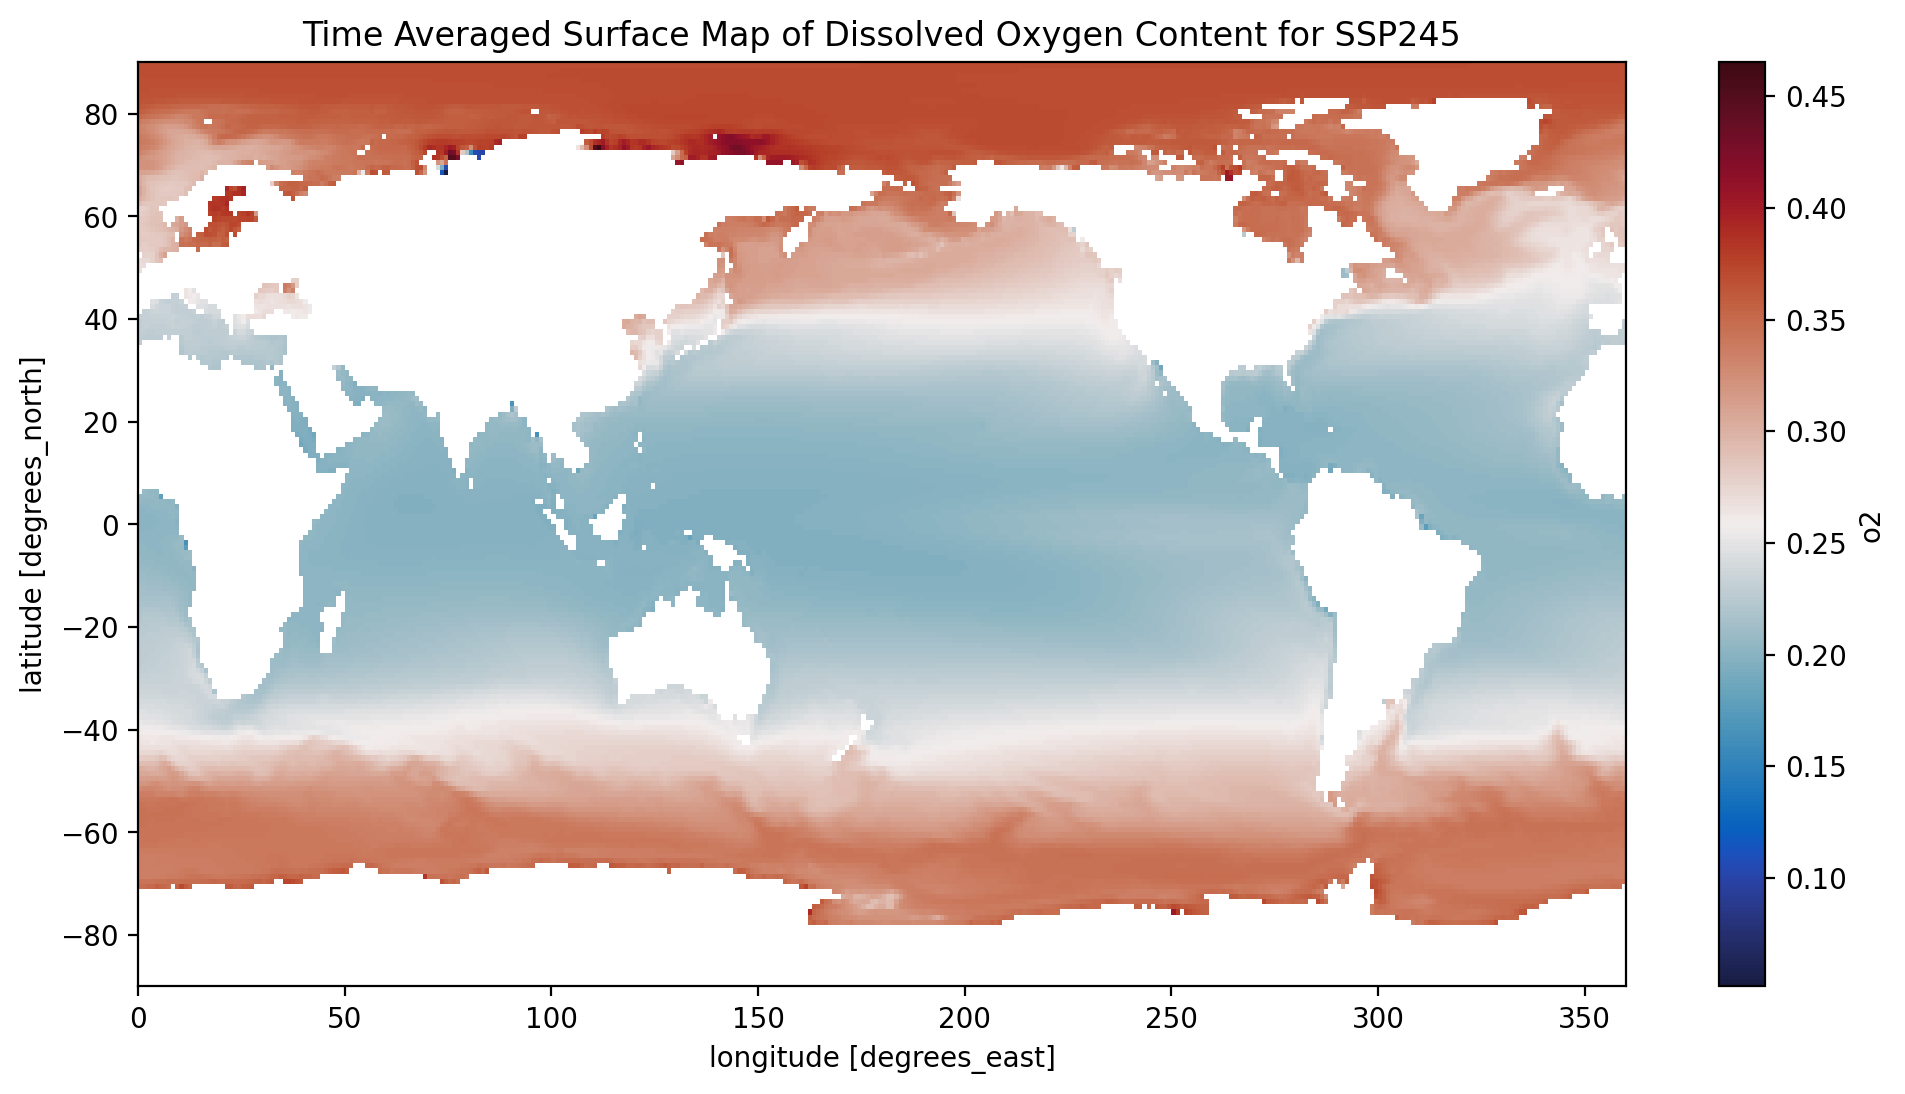

In [12]:
#time averaged across entire time period
avg_O2_SSP245 = O2_SSP245.mean(dim='time').isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Time Averaged Surface Map of Dissolved Oxygen Content for SSP245')

Text(0.5, 1.0, 'Time Averaged Zonal Map of Dissolved Oxygen Content for SSP245')

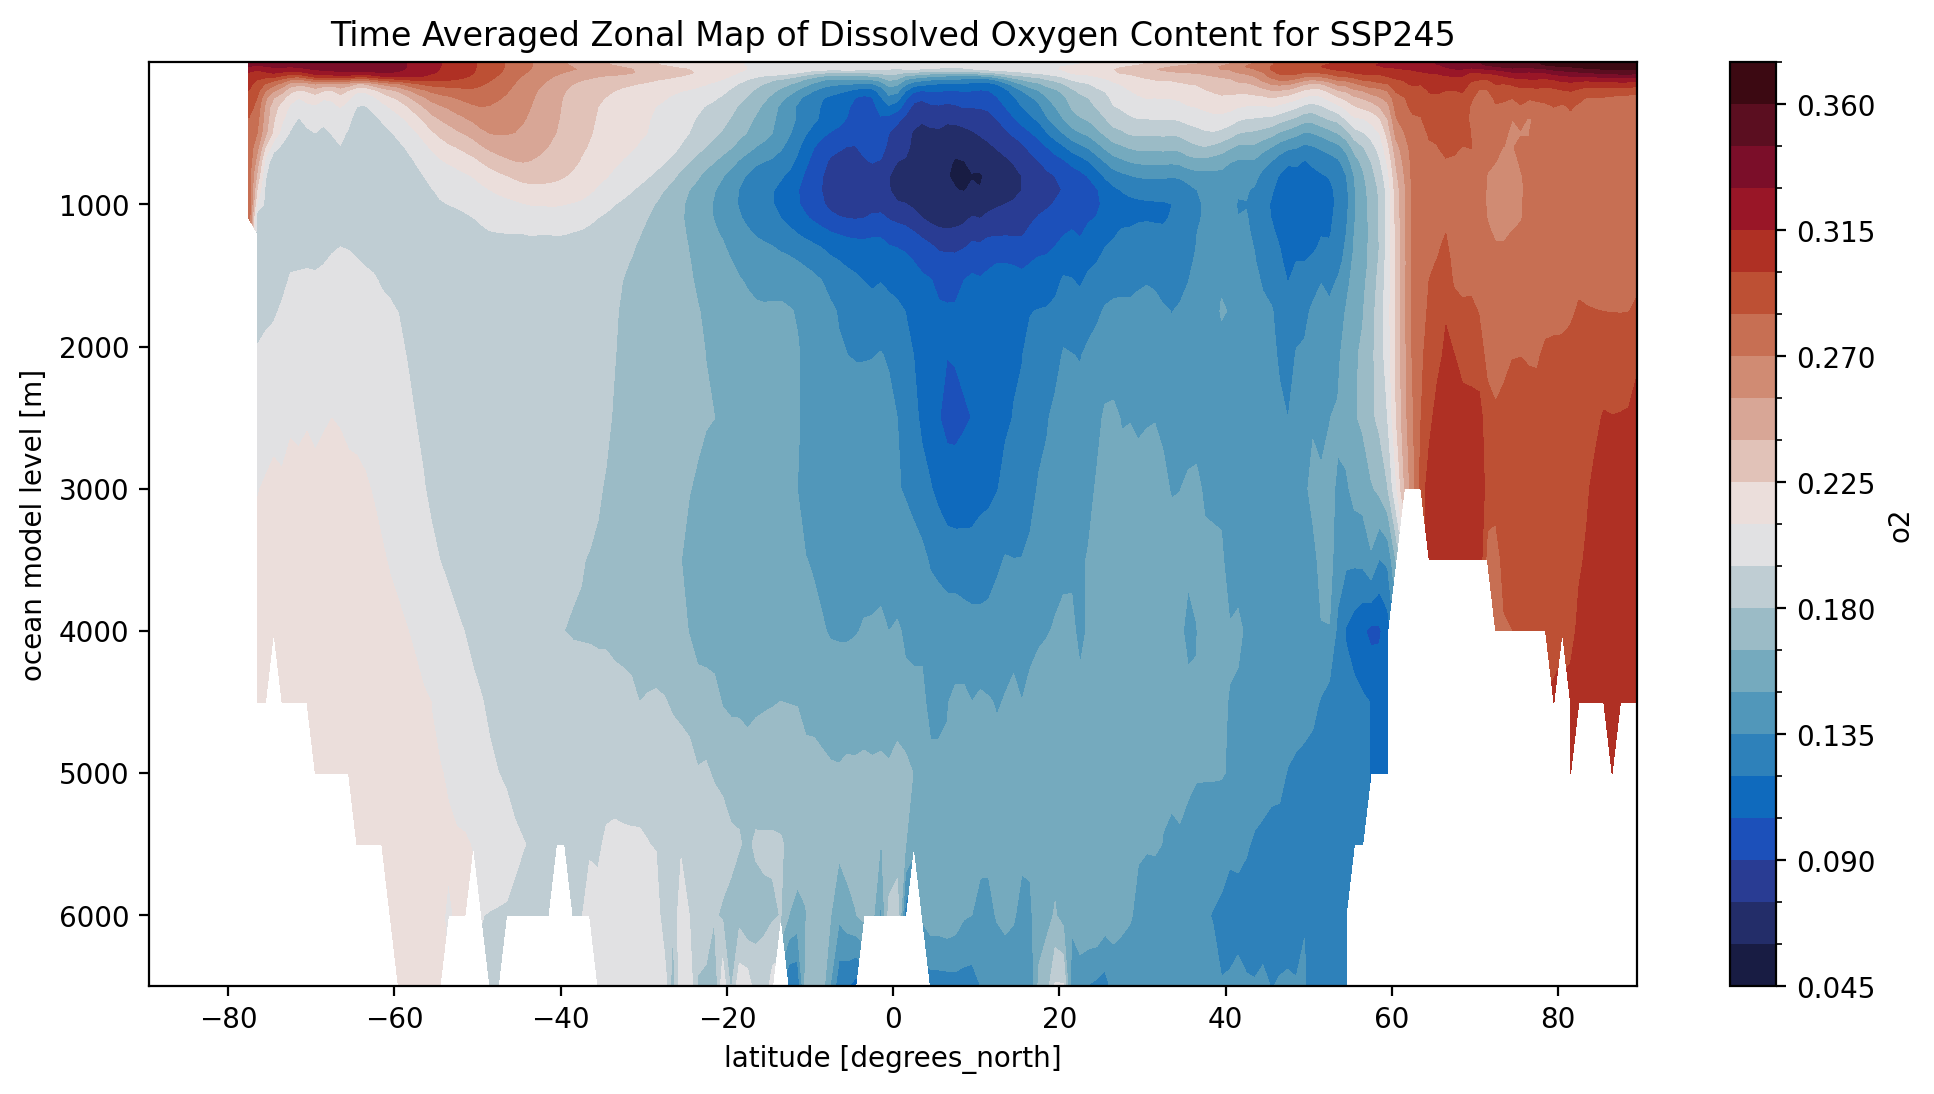

In [13]:
#time averaged across entire time period
ta_O2_SSP245 = O2_SSP245.mean(dim='time')
zm_O2_SSP245 = ta_O2_SSP245.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, levels=30)
plt.title('Time Averaged Zonal Map of Dissolved Oxygen Content for SSP245')

Text(0.5, 1.0, 'Time Averaged Surface Map of Oxygen Saturation Content for SSP245')

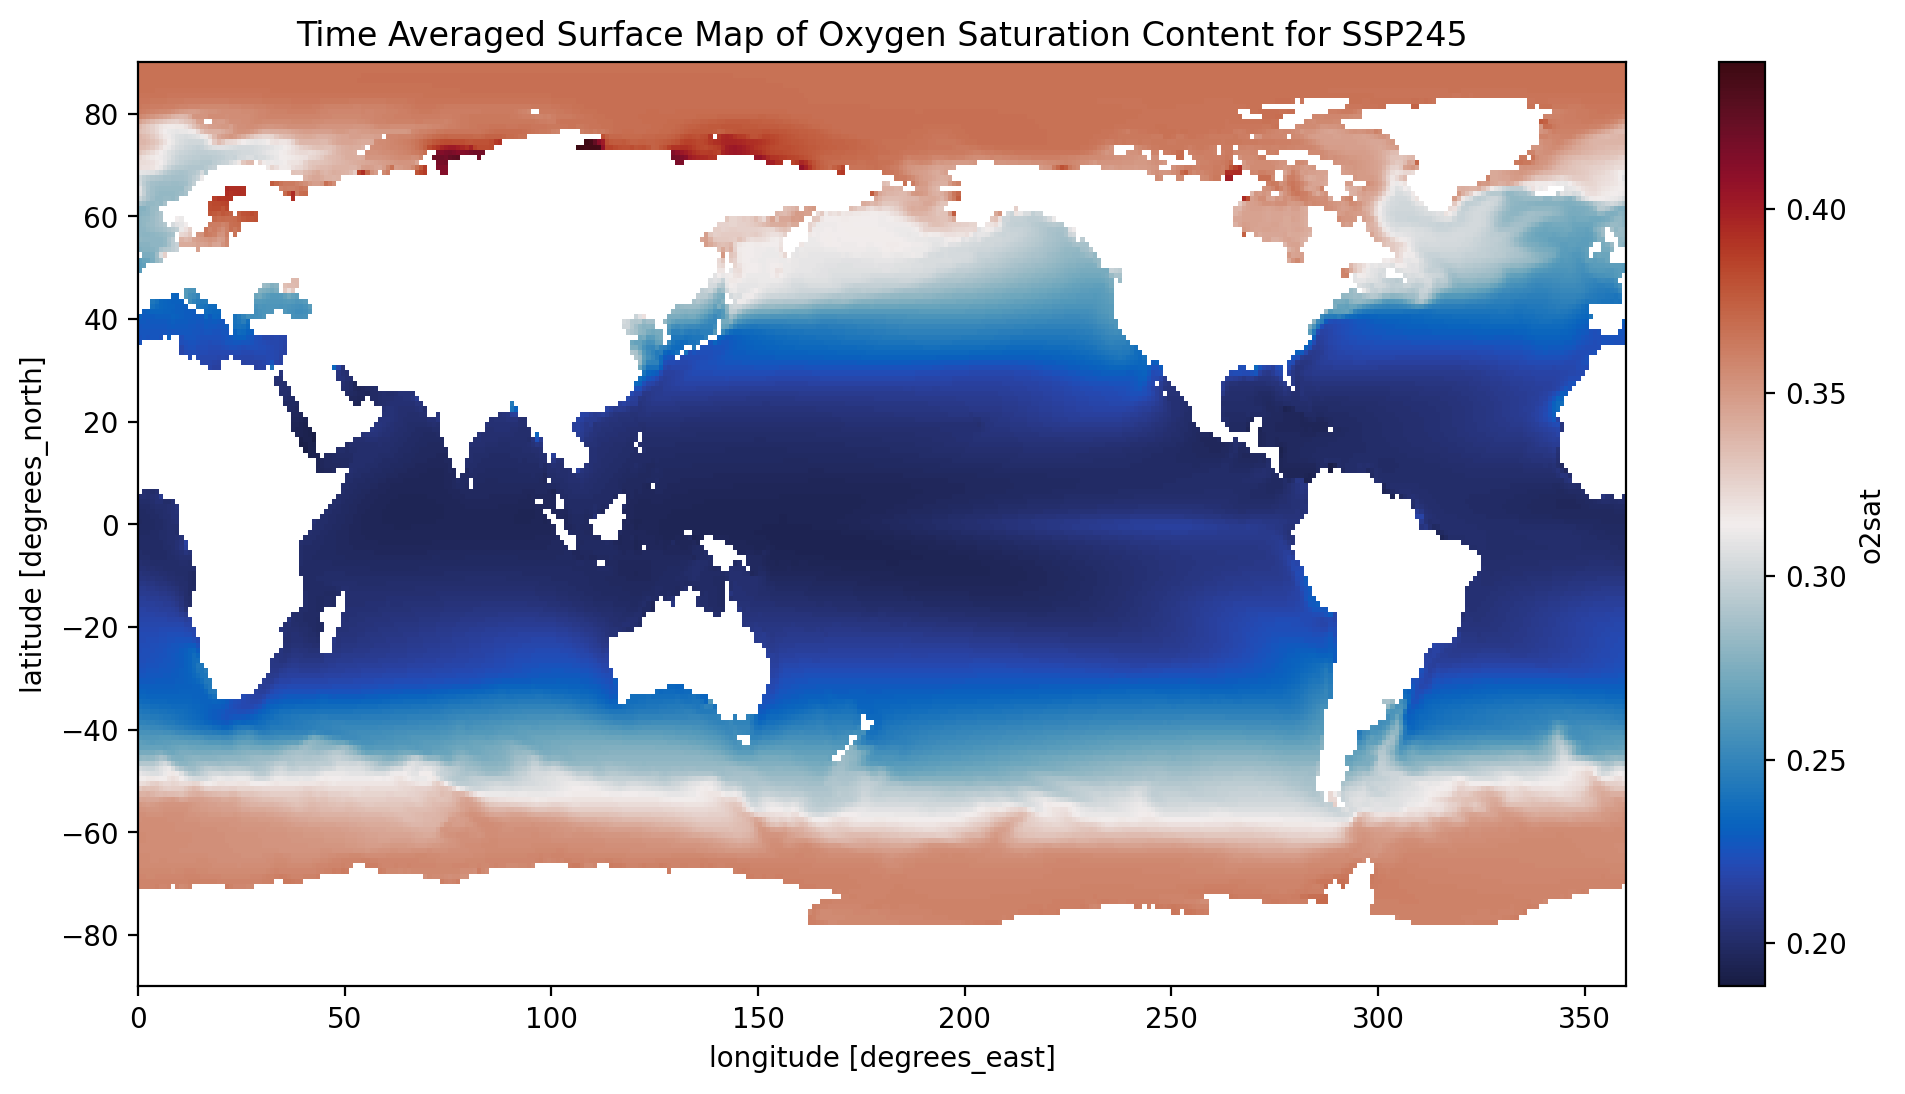

In [14]:
#time averaged across entire time period
avg_O2_sat_SSP245 = O2_sat_SSP245.mean(dim='time').isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Time Averaged Surface Map of Oxygen Saturation Content for SSP245')

Text(0.5, 1.0, 'Time Averaged Zonal Map of Oxygen Saturation Content for SSP245')

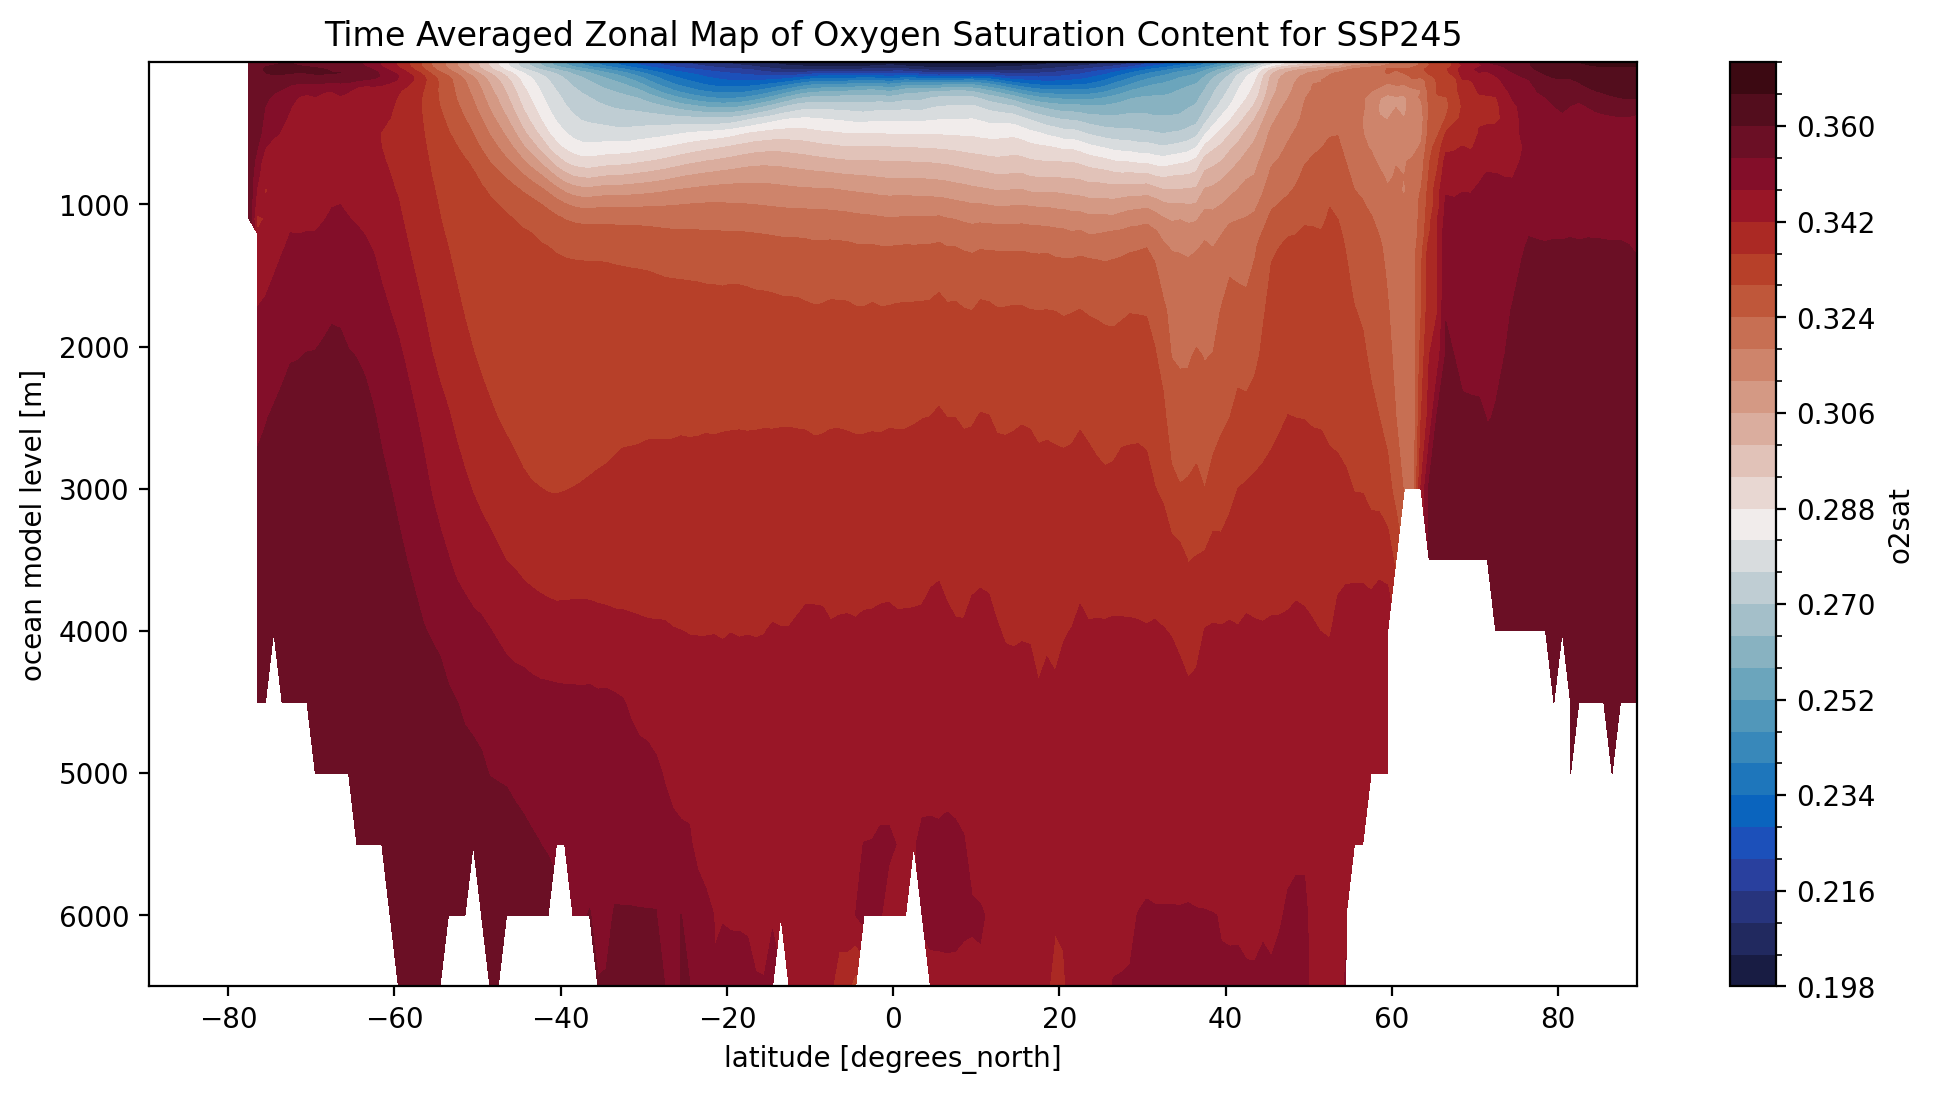

In [15]:
#time averaged across entire time period
ta_O2_sat_SSP245 = O2_sat_SSP245.mean(dim='time')
zm_O2_sat_SSP245 = ta_O2_sat_SSP245.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, levels=30)
plt.title('Time Averaged Zonal Map of Oxygen Saturation Content for SSP245')

Text(0.5, 1.0, 'Time Averaged Surface Map of Apparent Oxygen Utilization for SSP245')

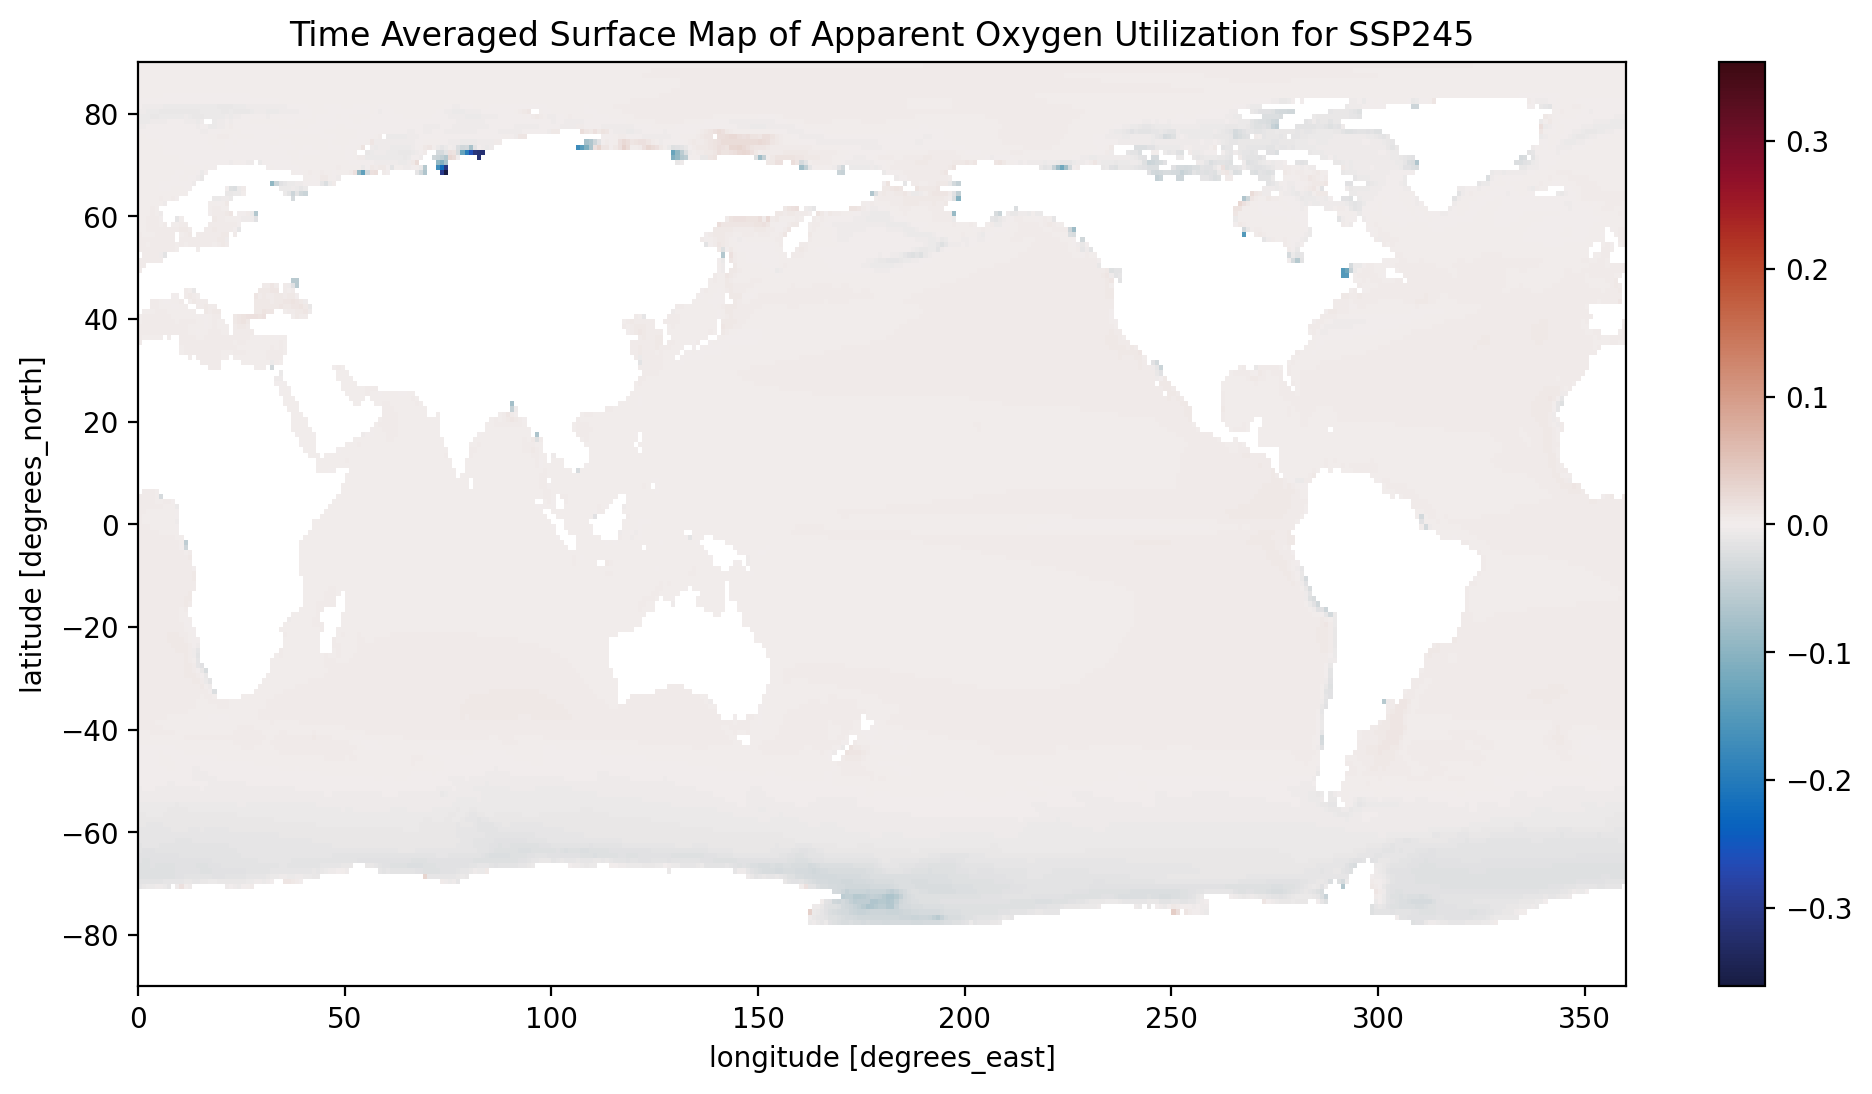

In [16]:
avg_O2_SSP245 = O2_SSP245.mean(dim='time')
avg_O2_sat_SSP245 = O2_sat_SSP245.mean(dim='time')
avg_aou_SSP245 = avg_O2_SSP245 - avg_O2_sat_SSP245
avg_aou_SSP245.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Time Averaged Surface Map of Apparent Oxygen Utilization for SSP245')

Text(0.5, 1.0, 'Time Averaged Zonal Map of Apparent Oxygen Utilization for SSP245')

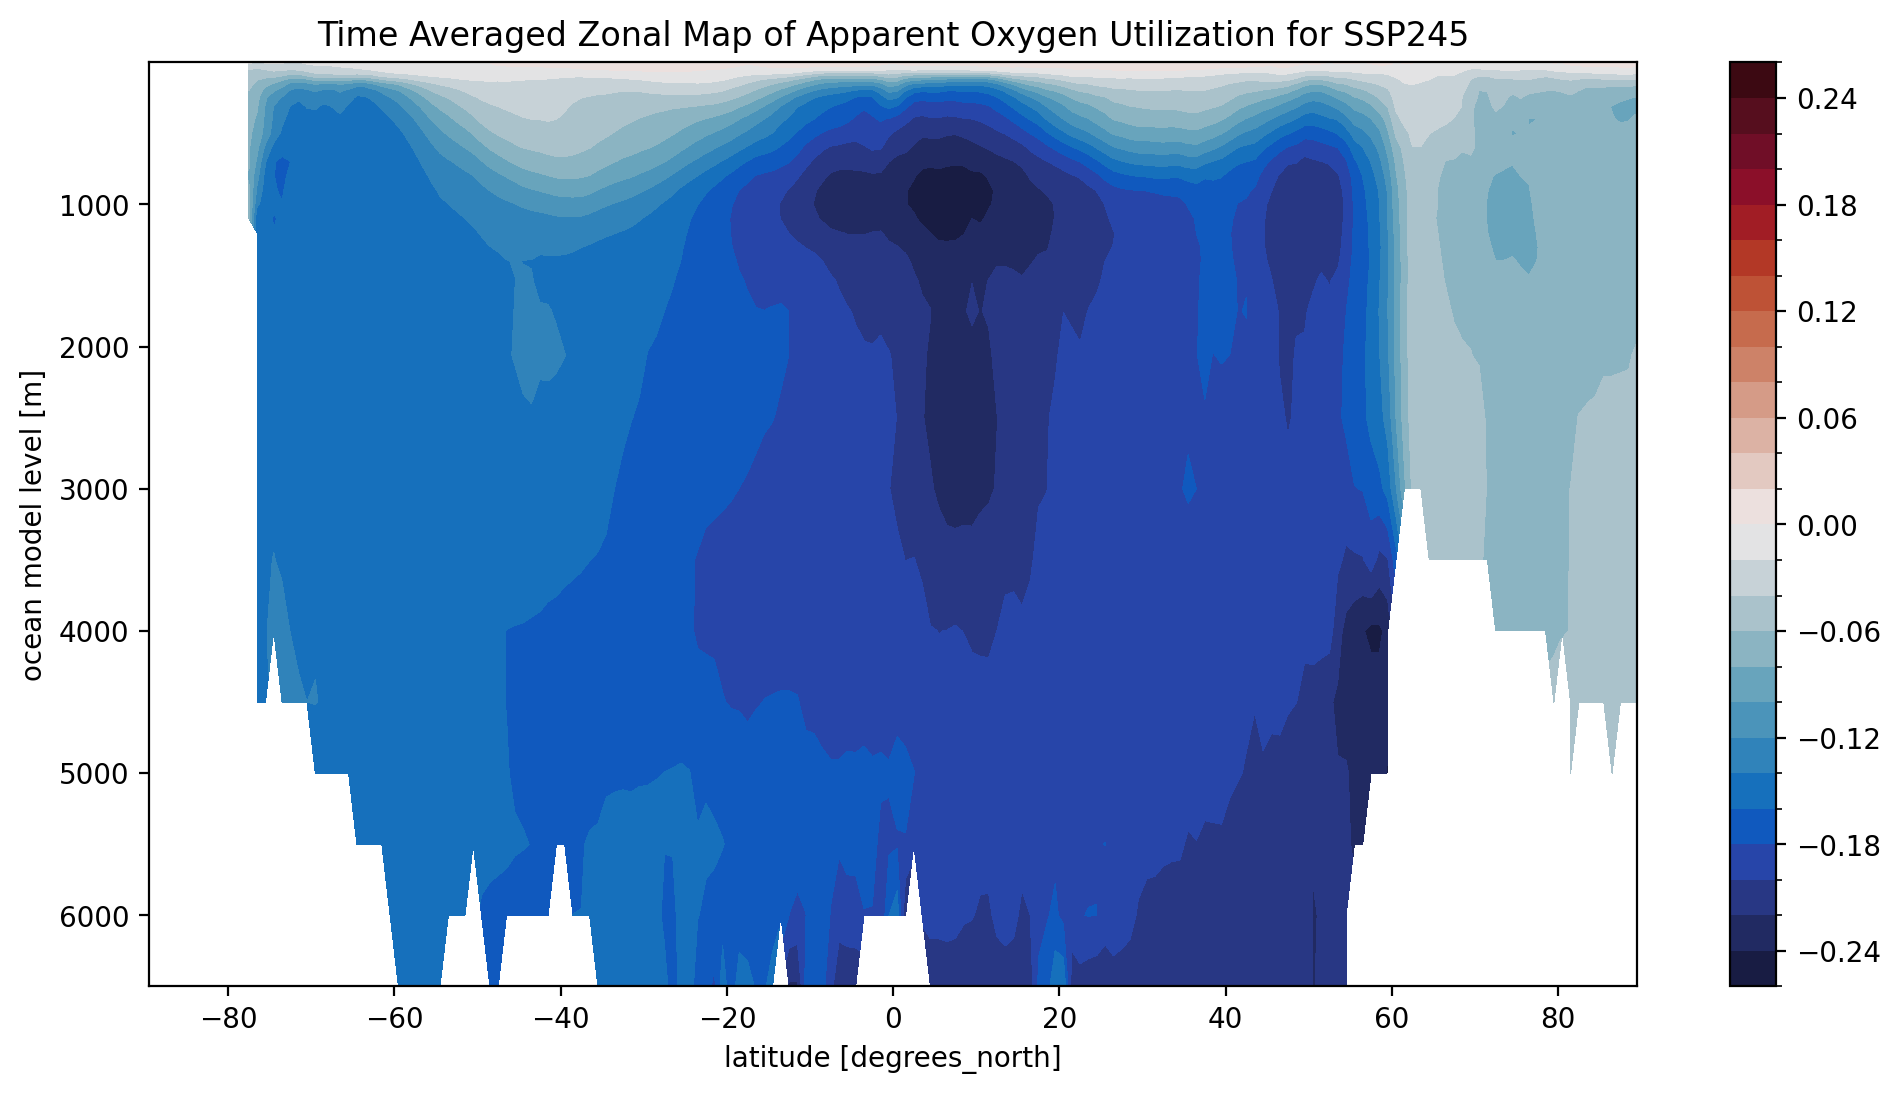

In [17]:
zm_O2_SSP245 = ta_O2_SSP245
zm_O2_sat_SSP245 = ta_O2_sat_SSP245
zm_aou_SSP245 = zm_O2_SSP245 - zm_O2_sat_SSP245
zm_aou_SSP245.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, levels=30)
plt.title('Time Averaged Zonal Map of Apparent Oxygen Utilization for SSP245')

### Difference Plots for SSP245

In [18]:
#difference plots for dissolved O2 and O2 saturation performed by Anna Coomans
diff_O2_SSP245=(O2_SSP245.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_SSP245.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))
diff_O2sat_SSP245=(O2_sat_SSP245.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_sat_SSP245.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))
AOU_SSP245=O2_SSP245-O2_sat_SSP245
diff_aou_d245=(AOU_SSP245.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    AOU_SSP245.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

Text(0.5, 1.0, 'Surficial Difference in Average Dissolved Oxygen Content for SSP245')

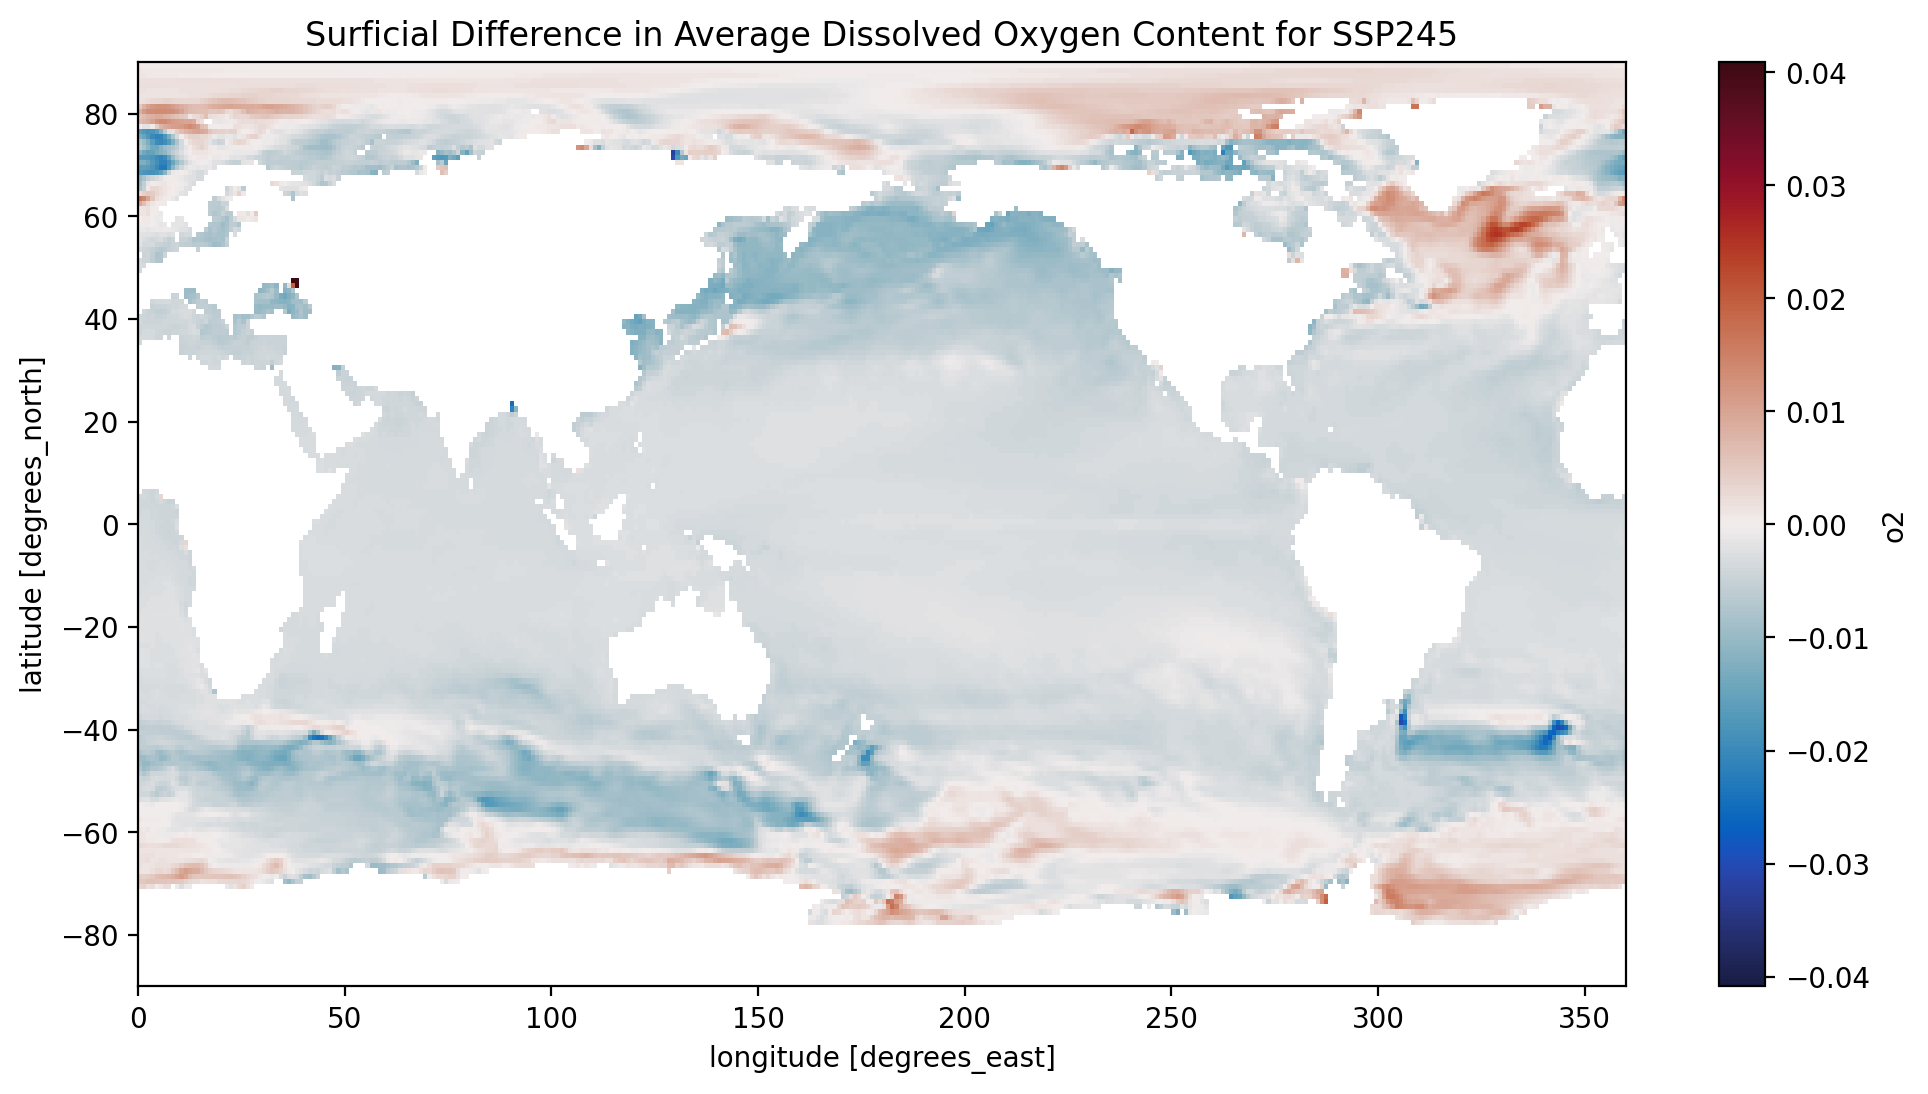

In [19]:
diff_245_O2_surface = diff_O2_SSP245.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Surficial Difference in Average Dissolved Oxygen Content for SSP245')

Text(0.5, 1.0, 'Zonal Averaged Difference of Dissolved Oxygen Content for SSP245')

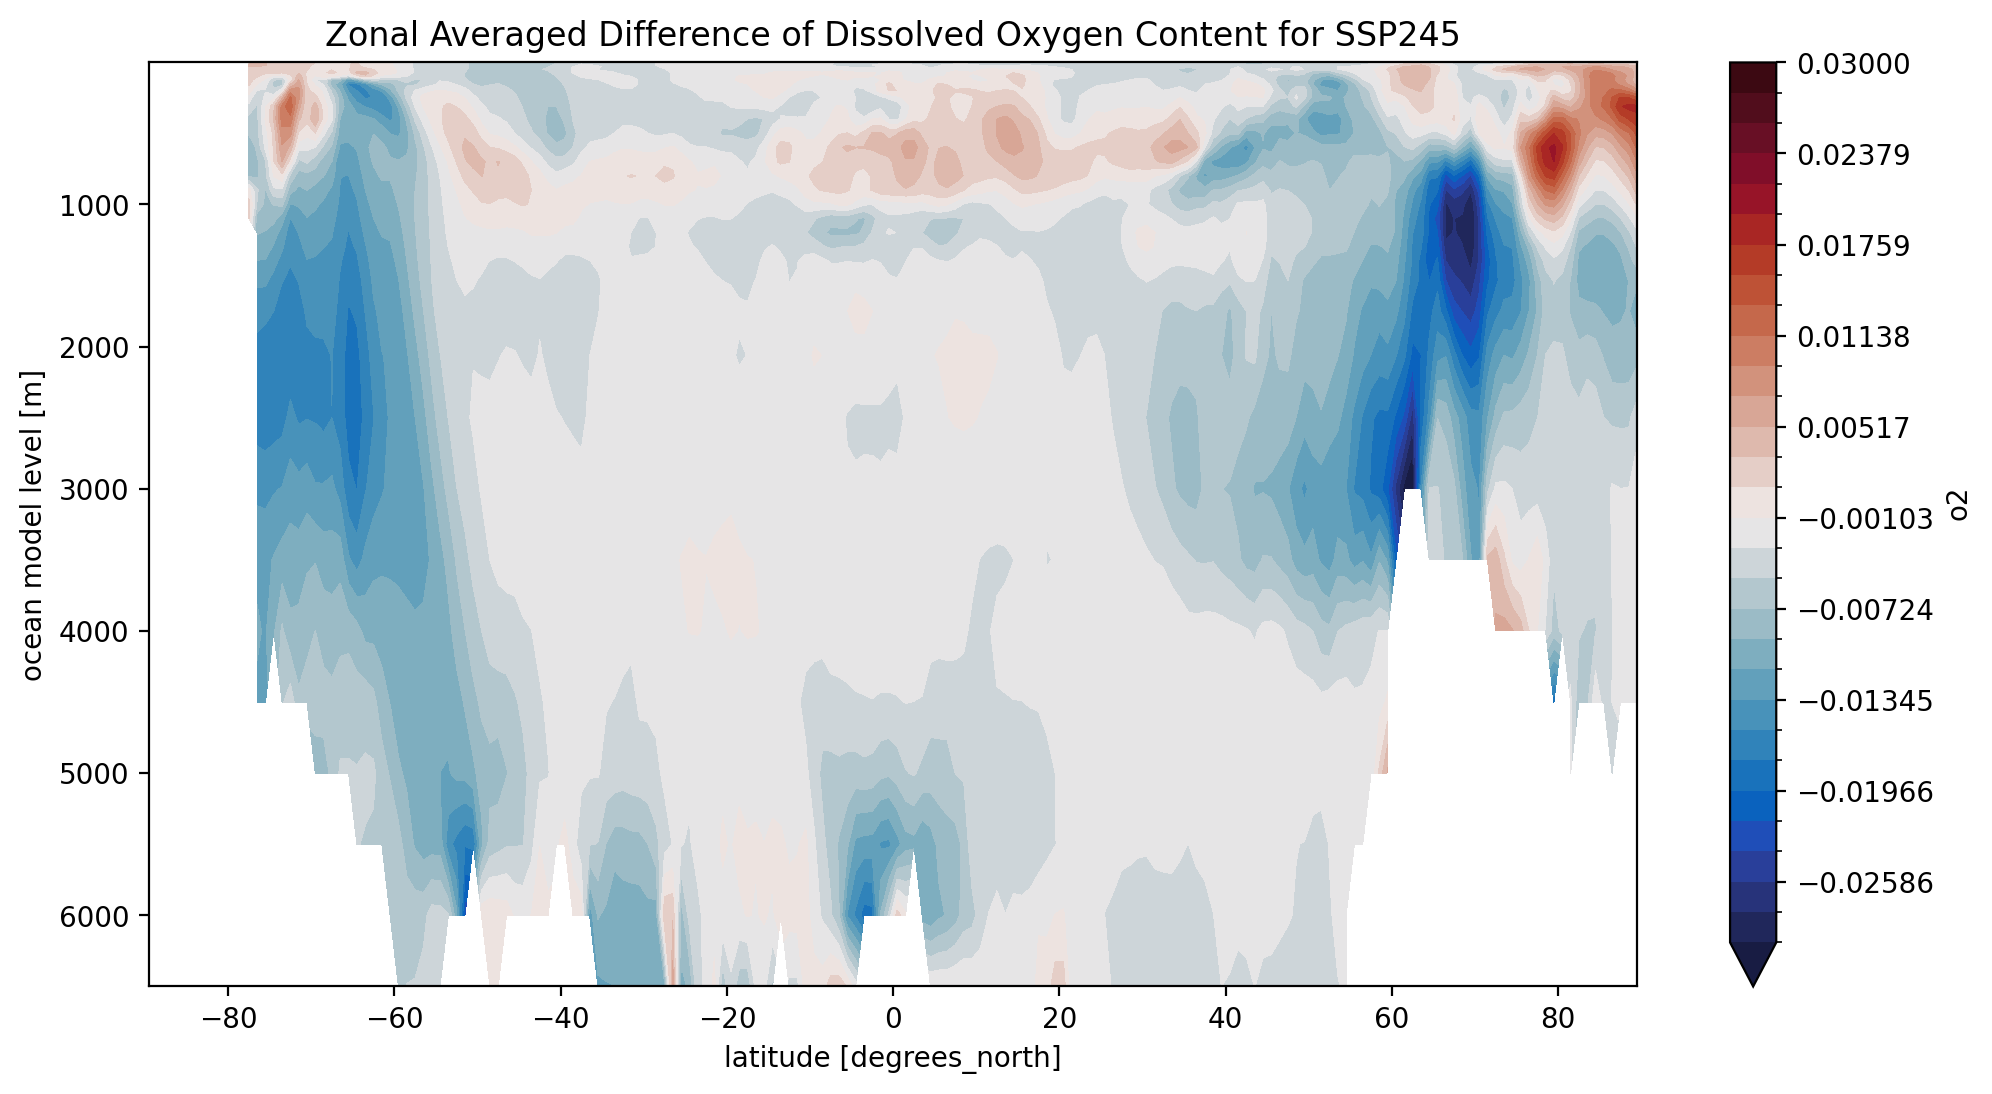

In [20]:
zd_245_02= diff_O2_SSP245.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, vmin=-0.03,vmax=0.03,levels=30)
plt.title('Zonal Averaged Difference of Dissolved Oxygen Content for SSP245')

Text(0.5, 1.0, 'Surficial Difference in Average Oxygen Saturation for SSP245')

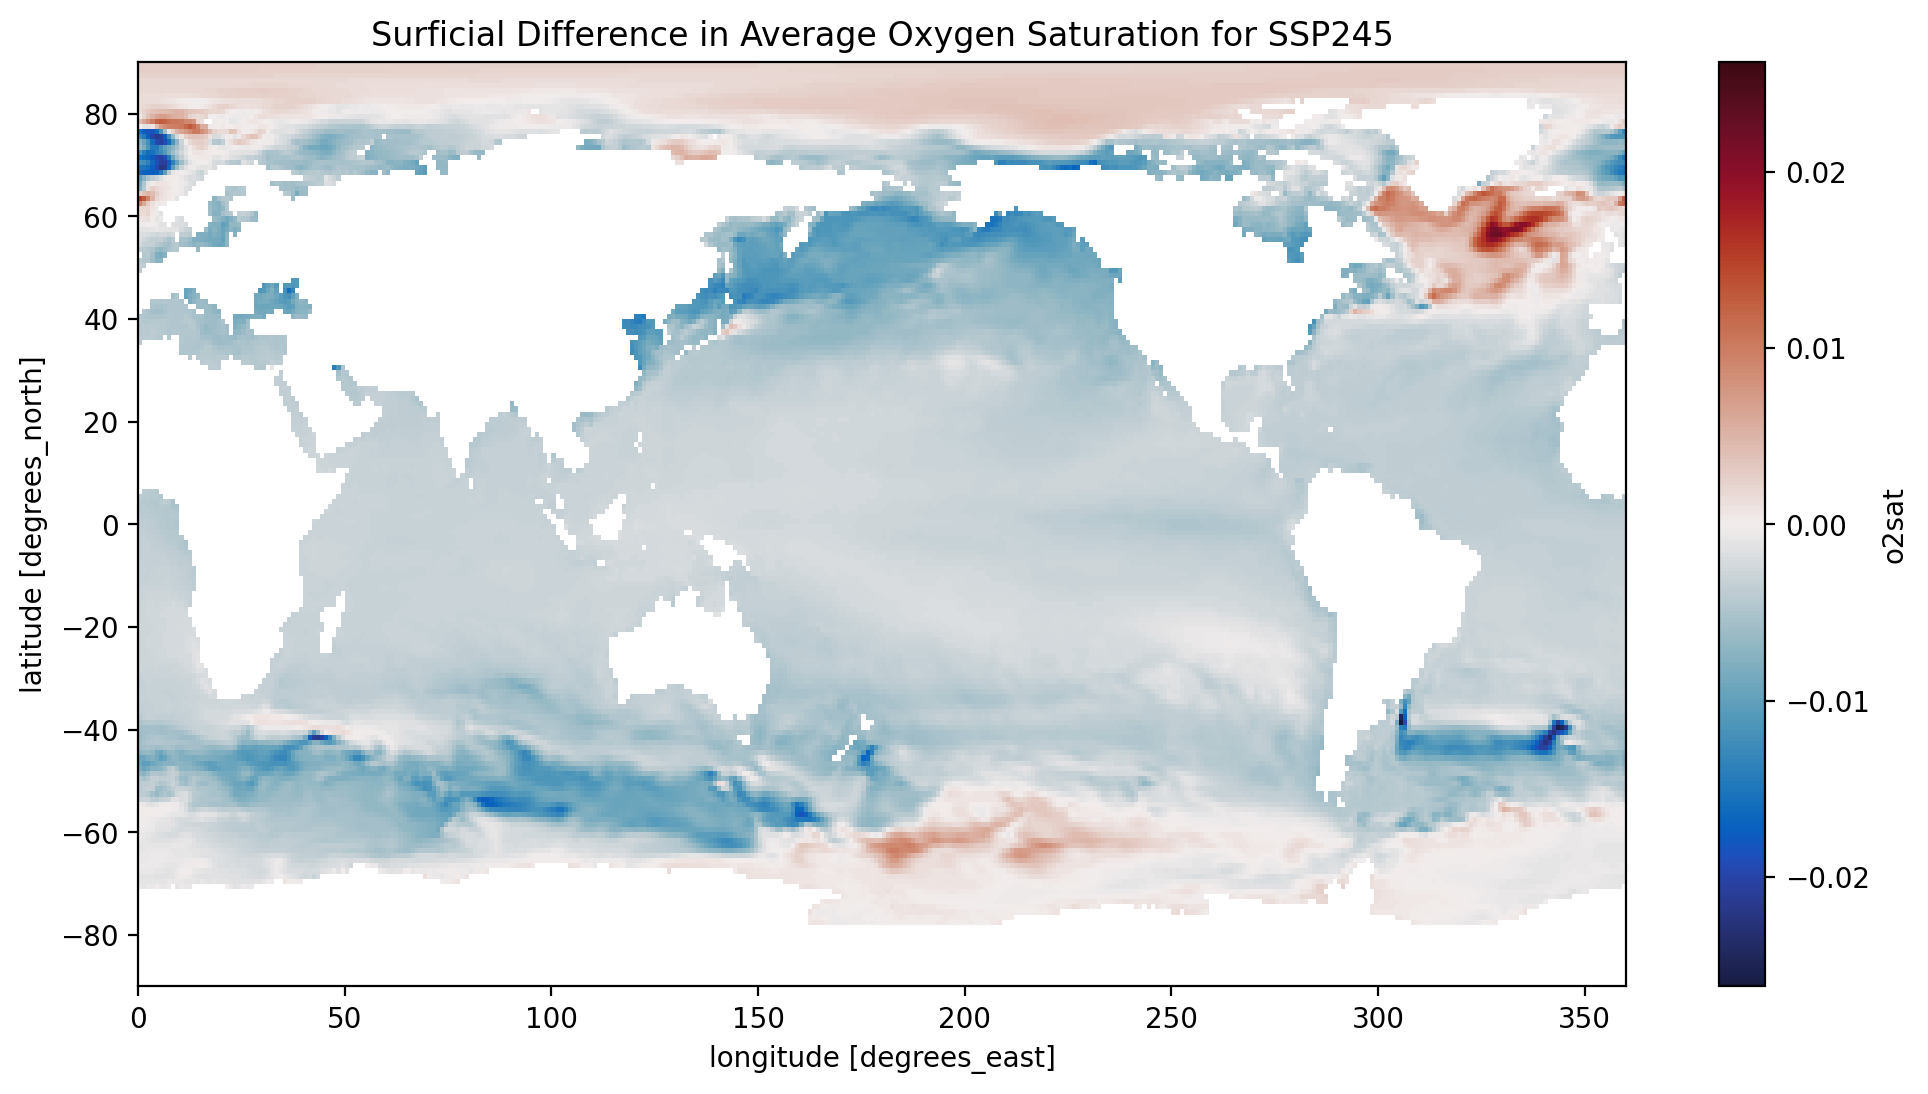

In [21]:
diff_245_O2sat_surface = diff_O2sat_SSP245.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Surficial Difference in Average Oxygen Saturation for SSP245')

Text(0.5, 1.0, 'Zonal Averaged Difference of Oxygen Saturation for SSP245')

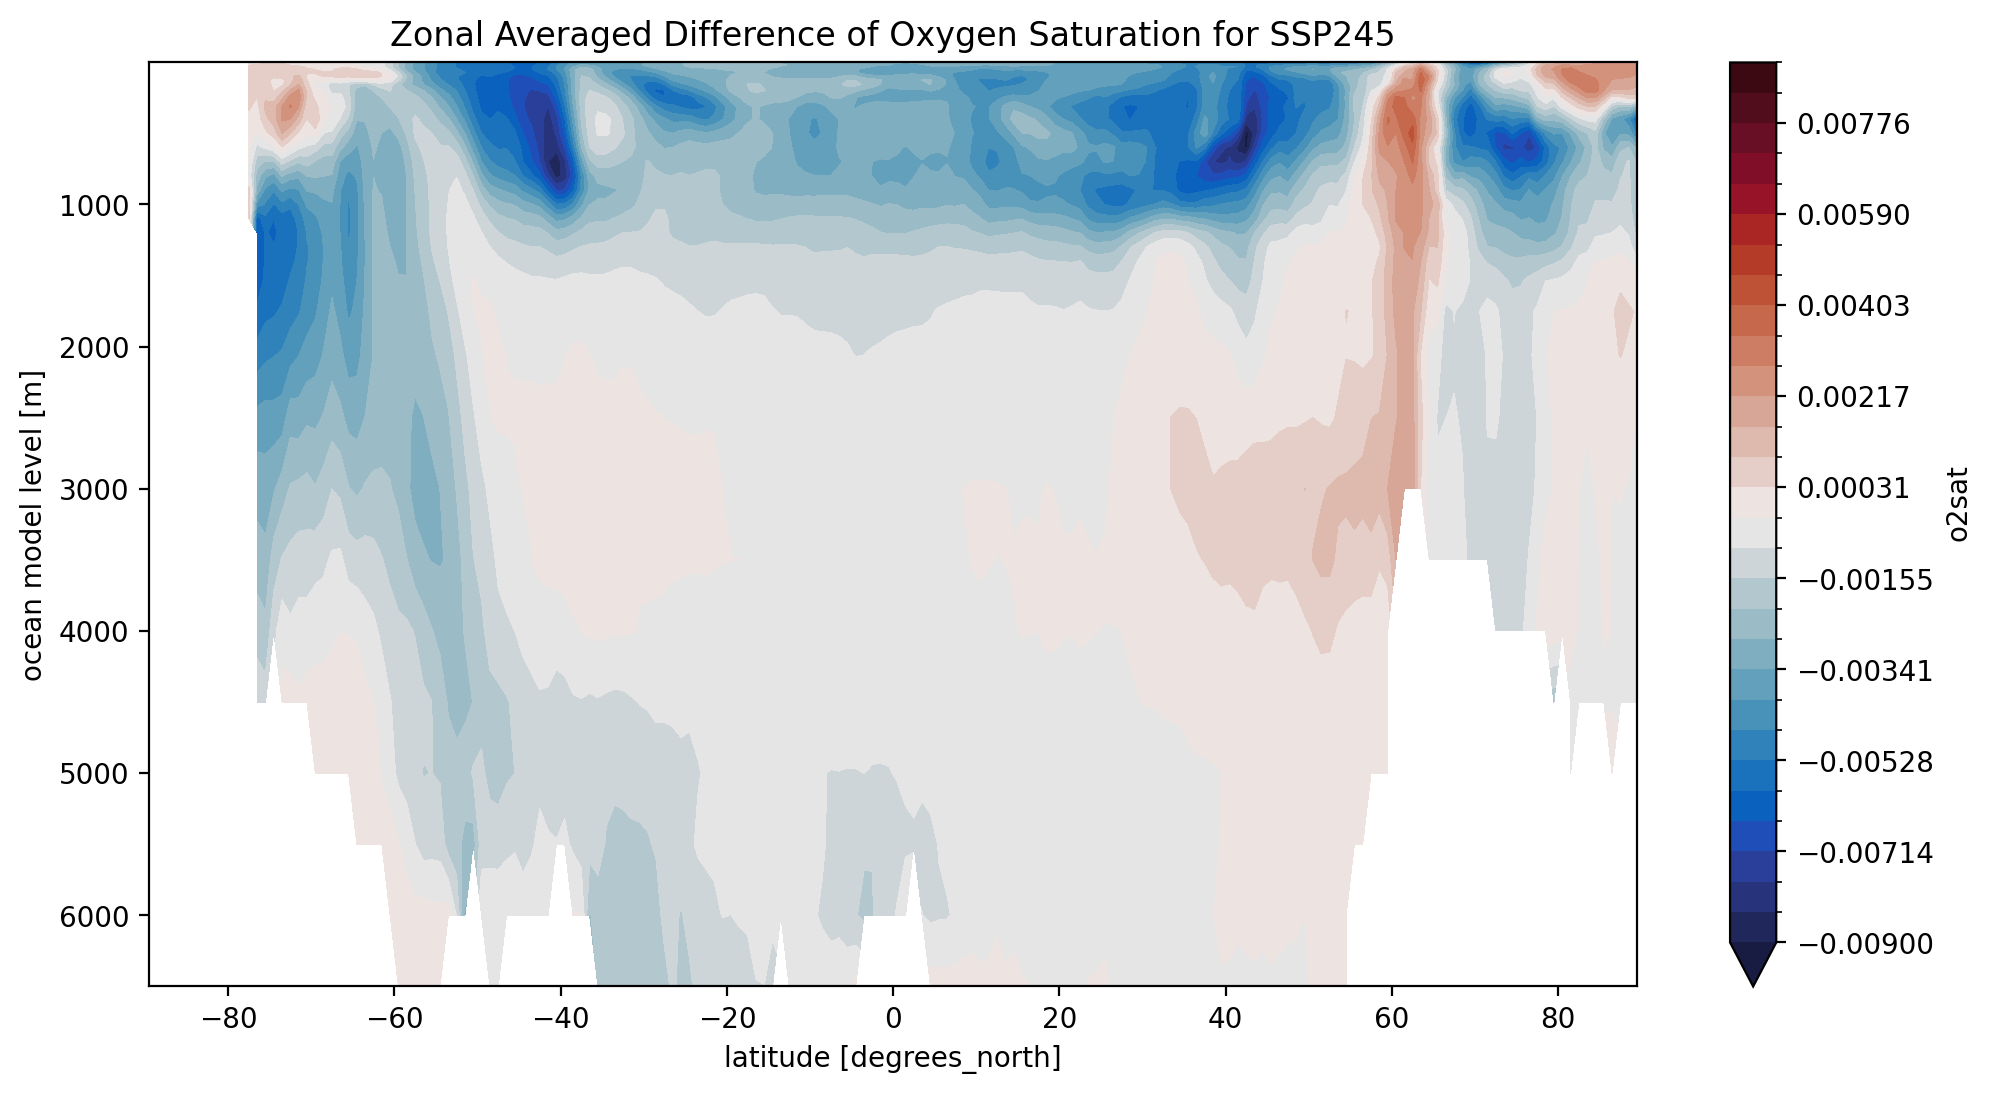

In [22]:
zd_245_02sat= diff_O2sat_SSP245.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False,  vmin=-0.009,vmax=0.009,levels=30)
plt.title('Zonal Averaged Difference of Oxygen Saturation for SSP245')

Text(0.5, 1.0, 'Surficial Difference in Average Apparent Oxygen Utilization for SSP245')

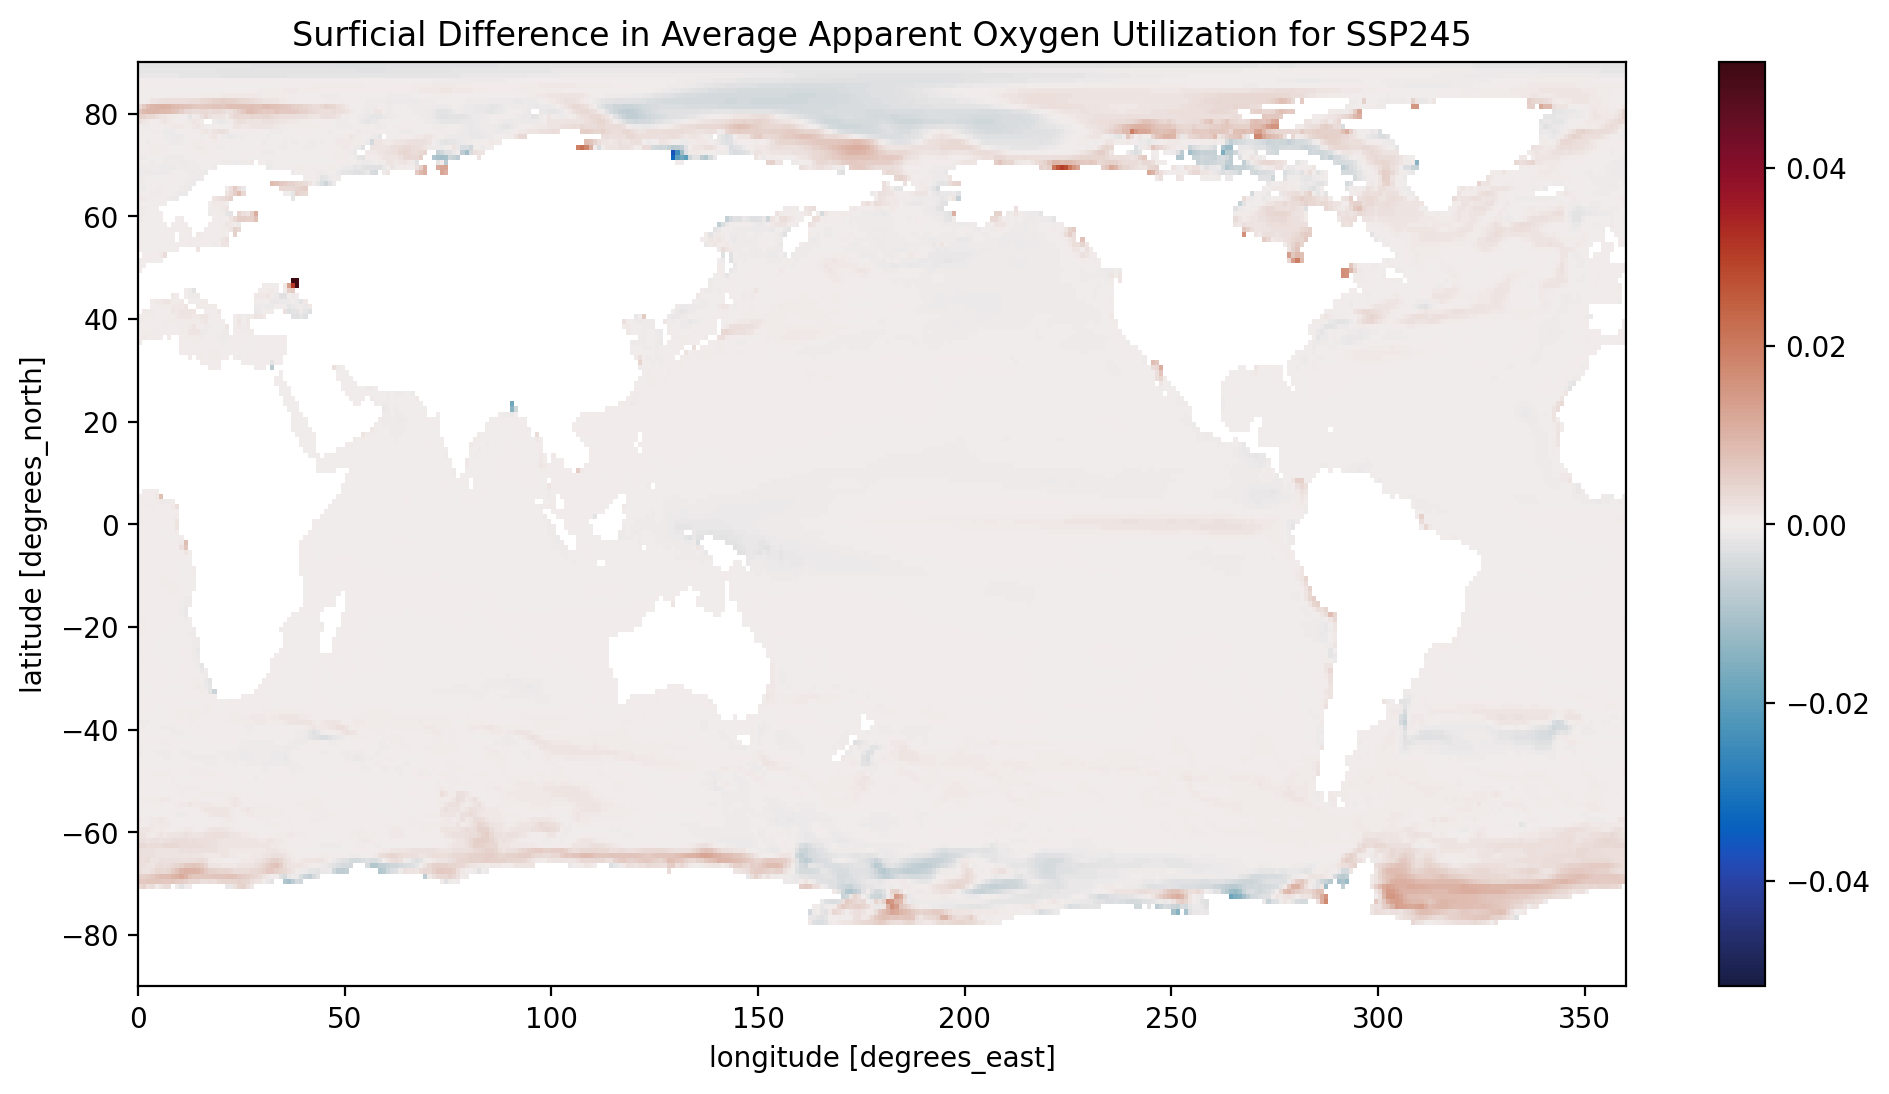

In [23]:
diff_aou_surface = diff_aou_d245.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Surficial Difference in Average Apparent Oxygen Utilization for SSP245')

Text(0.5, 1.0, 'Zonal Averaged Difference of Apparent Oxygen Utilization for SSP245')

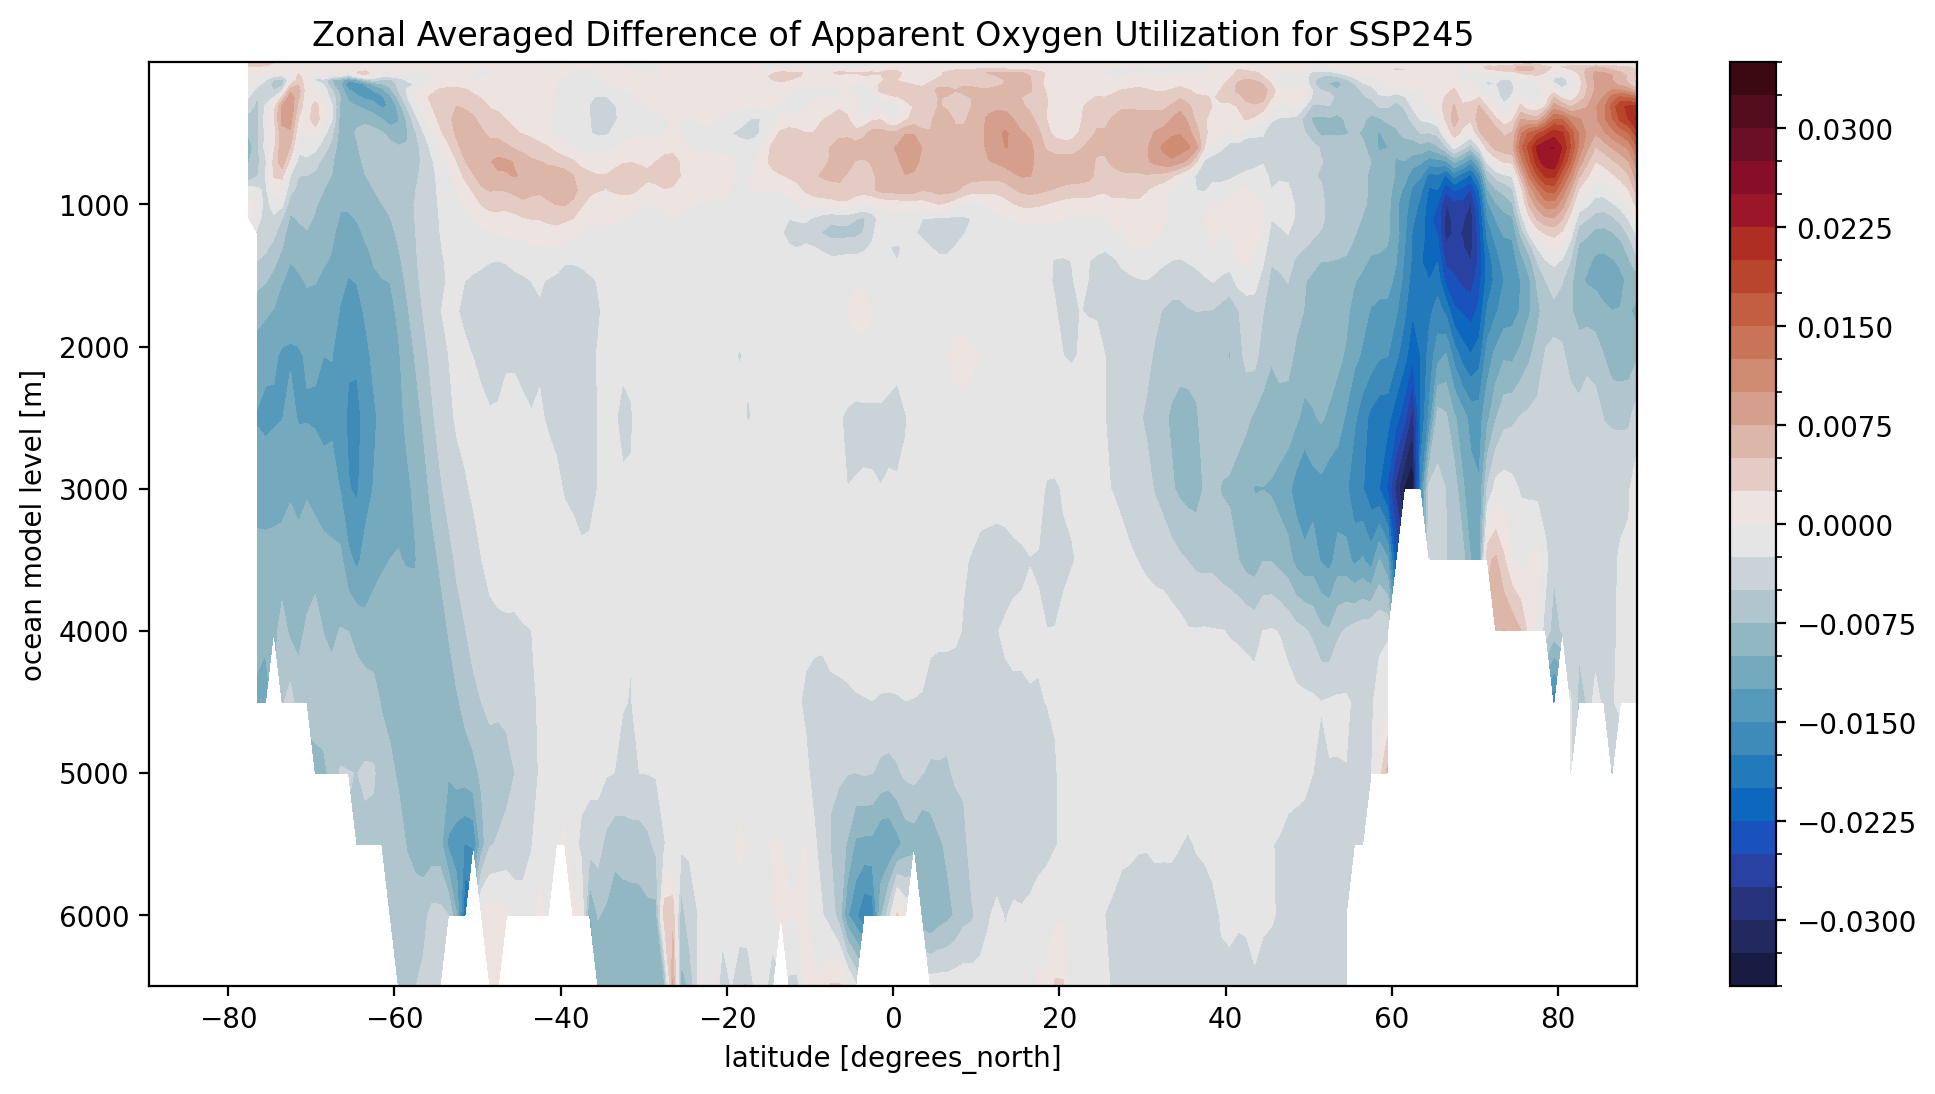

In [24]:
zd_245_aou= diff_aou_d245.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, levels=30)
plt.title('Zonal Averaged Difference of Apparent Oxygen Utilization for SSP245')

### For analysis at the basin scale you will need the ocean basins mask provided below. This seperates the global ocean into distinct basins identified by integer values such that:
* ### Southern Ocean = 1
* ### Atlantic Ocean = 2
* ### Pacific Ocean = 3
* ### Arctic Ocean = 4
* ### Indian Ocean = 5

In [29]:
esm4_basins = xr.open_dataset('../data/basins/esm4_basins_gr.nc',decode_times=False).basins

In [30]:
esm4_O2 = O2_SSP245
esm4_O2sat = O2_sat_SSP245
esm4_aou = O2_SSP245 - O2_sat_SSP245

In [33]:
esm4_O2

<xarray.DataArray 'o2' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-o2, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration
    original_name:  o2
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

In [31]:
esm4_aou

<xarray.DataArray (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<sub, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00

Text(0.5, 1.0, 'Ocean Basin Mask')

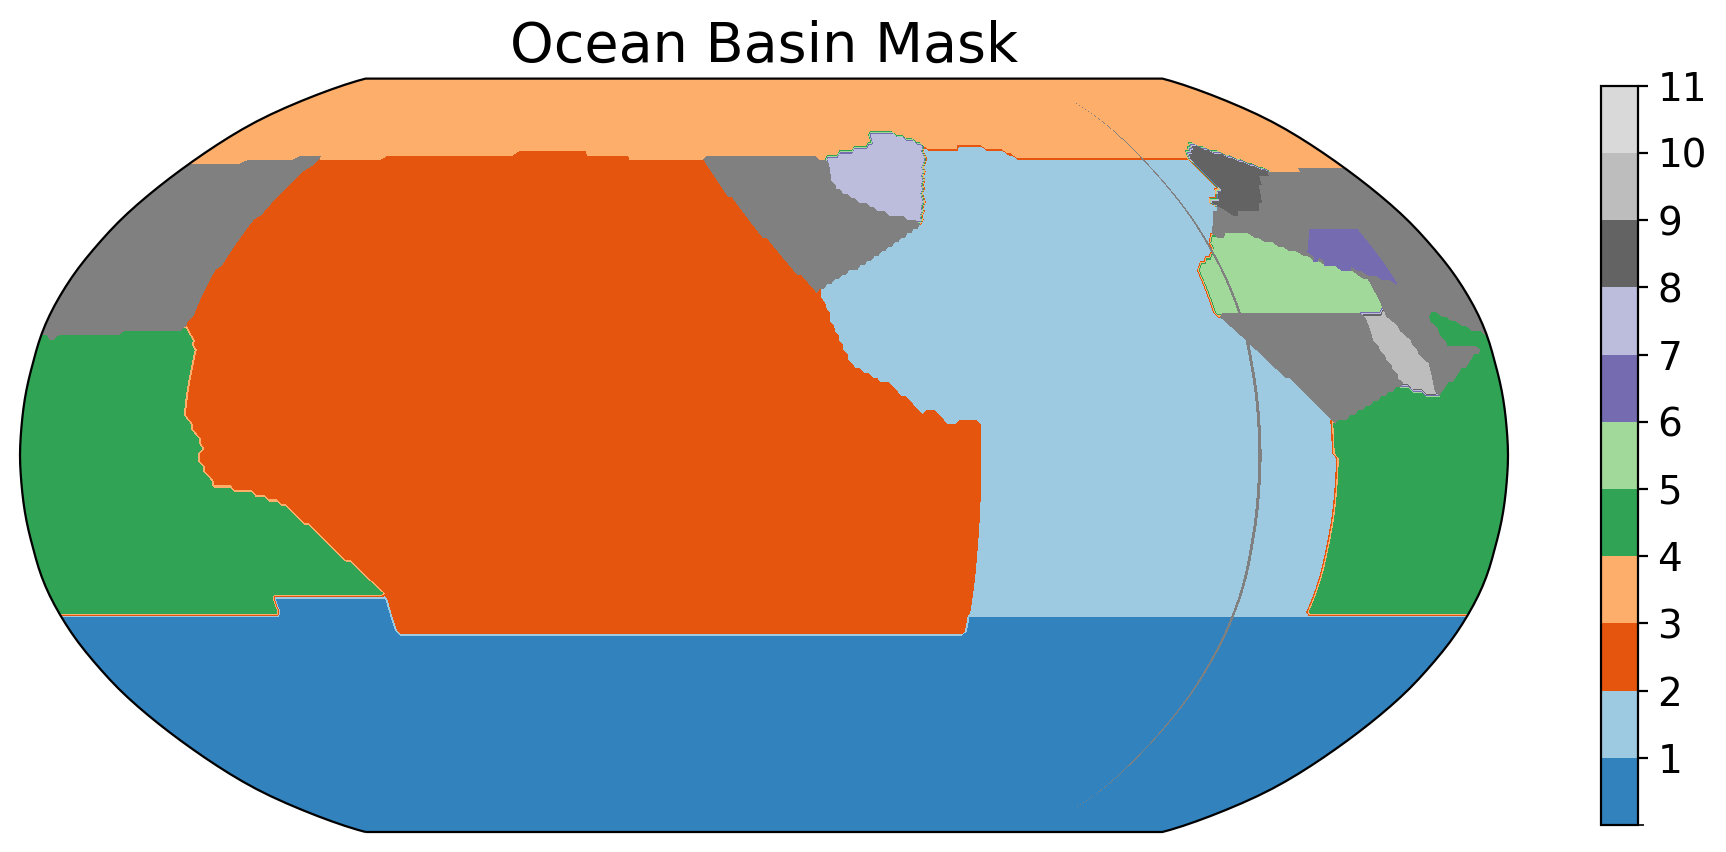

In [13]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = esm4_basins.plot.contourf(x='longitude',y='latitude',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [35]:
southernocean = (esm4_basins.where(esm4_basins==1) /  esm4_basins.where(esm4_basins==1)) ### Values 1 over southern, NaN elsewhere
atlanticocean = (esm4_basins.where(esm4_basins==2) / esm4_basins.where(esm4_basins==2)) ### Values 2 over atlantic, NaN elsewhere
pacificocean = (esm4_basins.where(esm4_basins==3) / esm4_basins.where(esm4_basins==3))
arcticocean = (esm4_basins.where(esm4_basins==4) / esm4_basins.where(esm4_basins==4))
indianocean = (esm4_basins.where(esm4_basins==5) / esm4_basins.where(esm4_basins==5))

In [15]:
southernocean

<xarray.DataArray 'basins' (latitude: 180, longitude: 360)>
array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lev        float64 2.5
    time       int64 0
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    lon        (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5

Text(0.5, 1.0, 'Ocean Basin Mask')

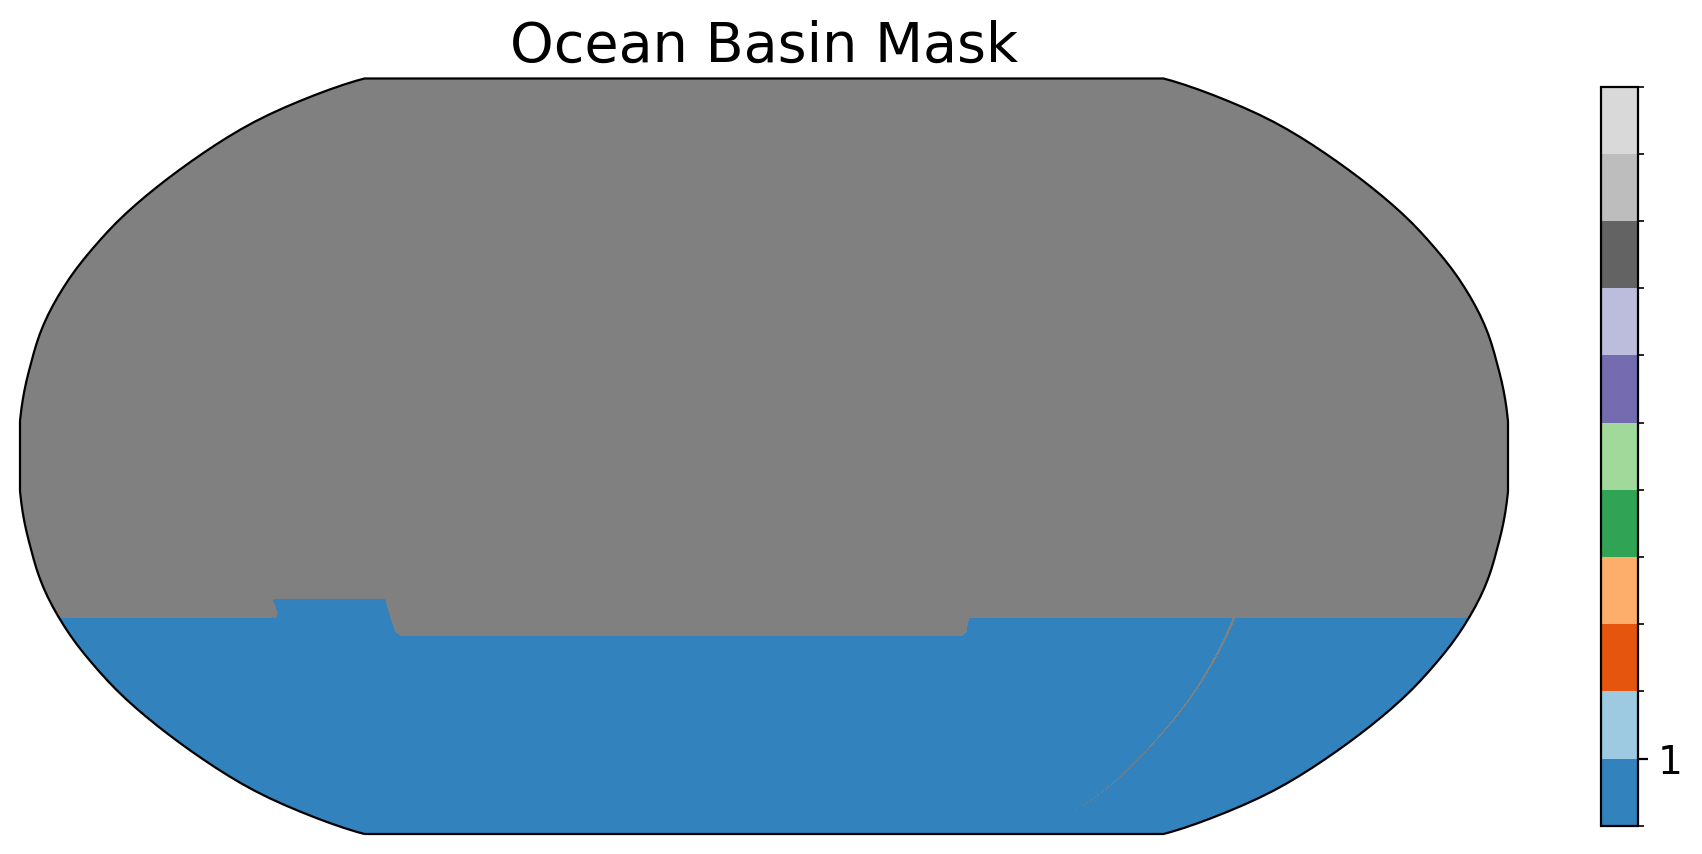

In [16]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = southernocean.plot.contourf(x='longitude',y='latitude',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [17]:
atlanticocean

<xarray.DataArray 'basins' (latitude: 180, longitude: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lev        float64 2.5
    time       int64 0
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    lon        (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5

Text(0.5, 1.0, 'Ocean Basin Mask')

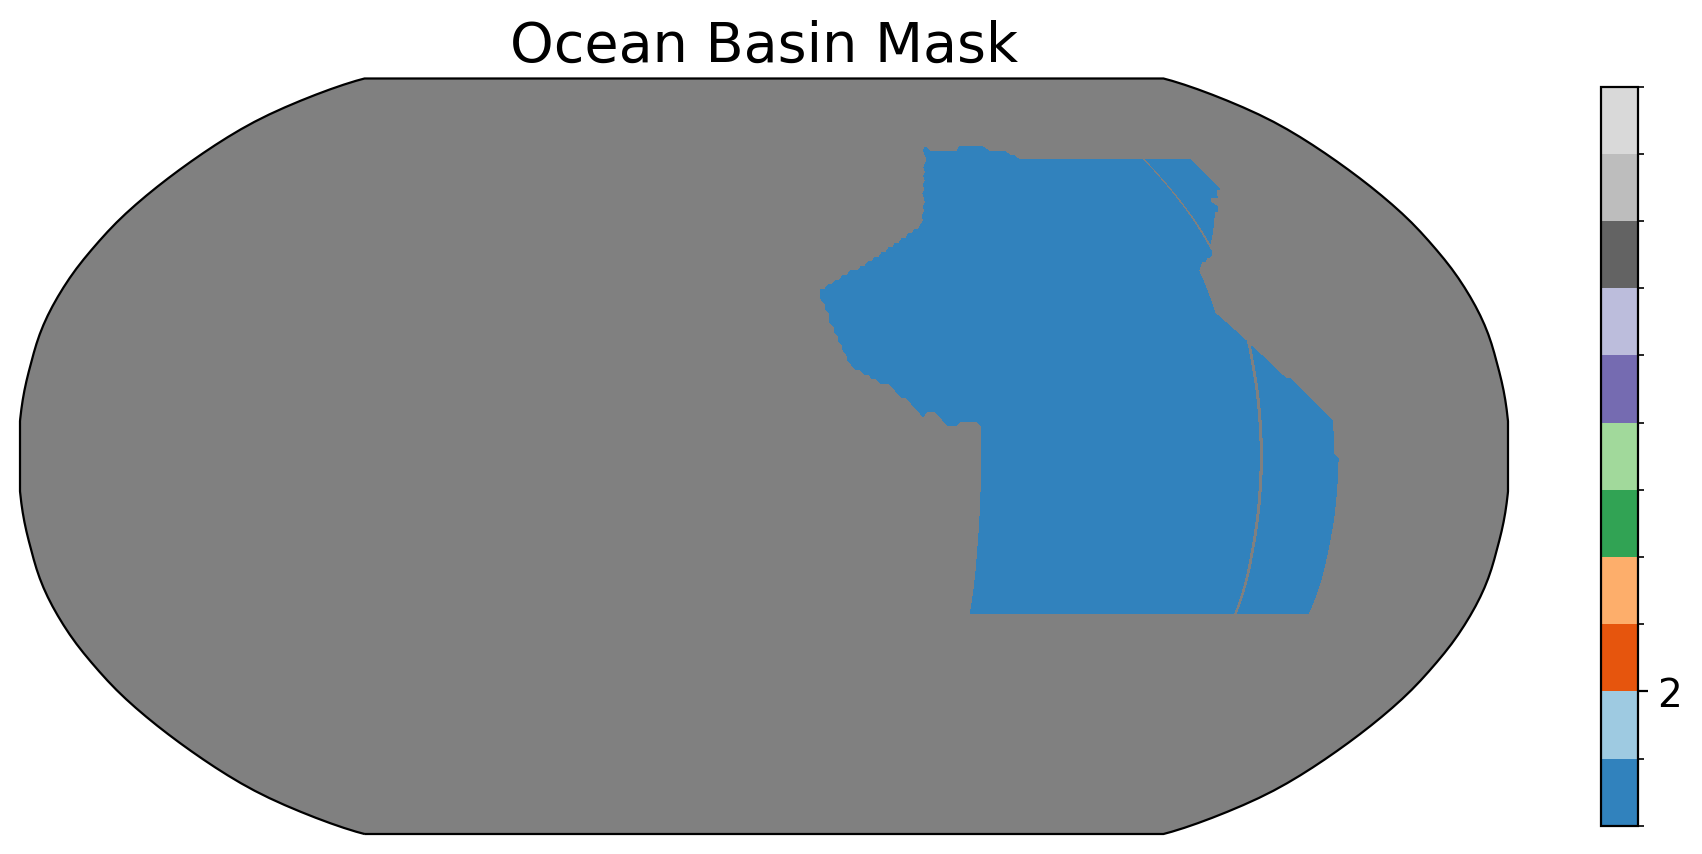

In [18]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = atlanticocean.plot.contourf(x='longitude',y='latitude',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[2], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [36]:
esm4_O2_atlantic = esm4_O2*atlanticocean

In [37]:
esm4_O2_atlantic

<xarray.DataArray (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<mul, shape=(1032, 35, 180, 360), dtype=float64, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    lon        (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5

In [38]:
esm4_O2_atlantic.drop(labels='lon')

<xarray.DataArray (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<mul, shape=(1032, 35, 180, 360), dtype=float64, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00

In [28]:
atlanticocean

<xarray.DataArray 'basins' (latitude: 180, longitude: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lev        float64 2.5
    time       int64 0
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    lon        (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5

In [20]:
esm4_aou_atlantic

<xarray.DataArray (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<mul, shape=(1032, 35, 180, 360), dtype=float64, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    lon        (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5

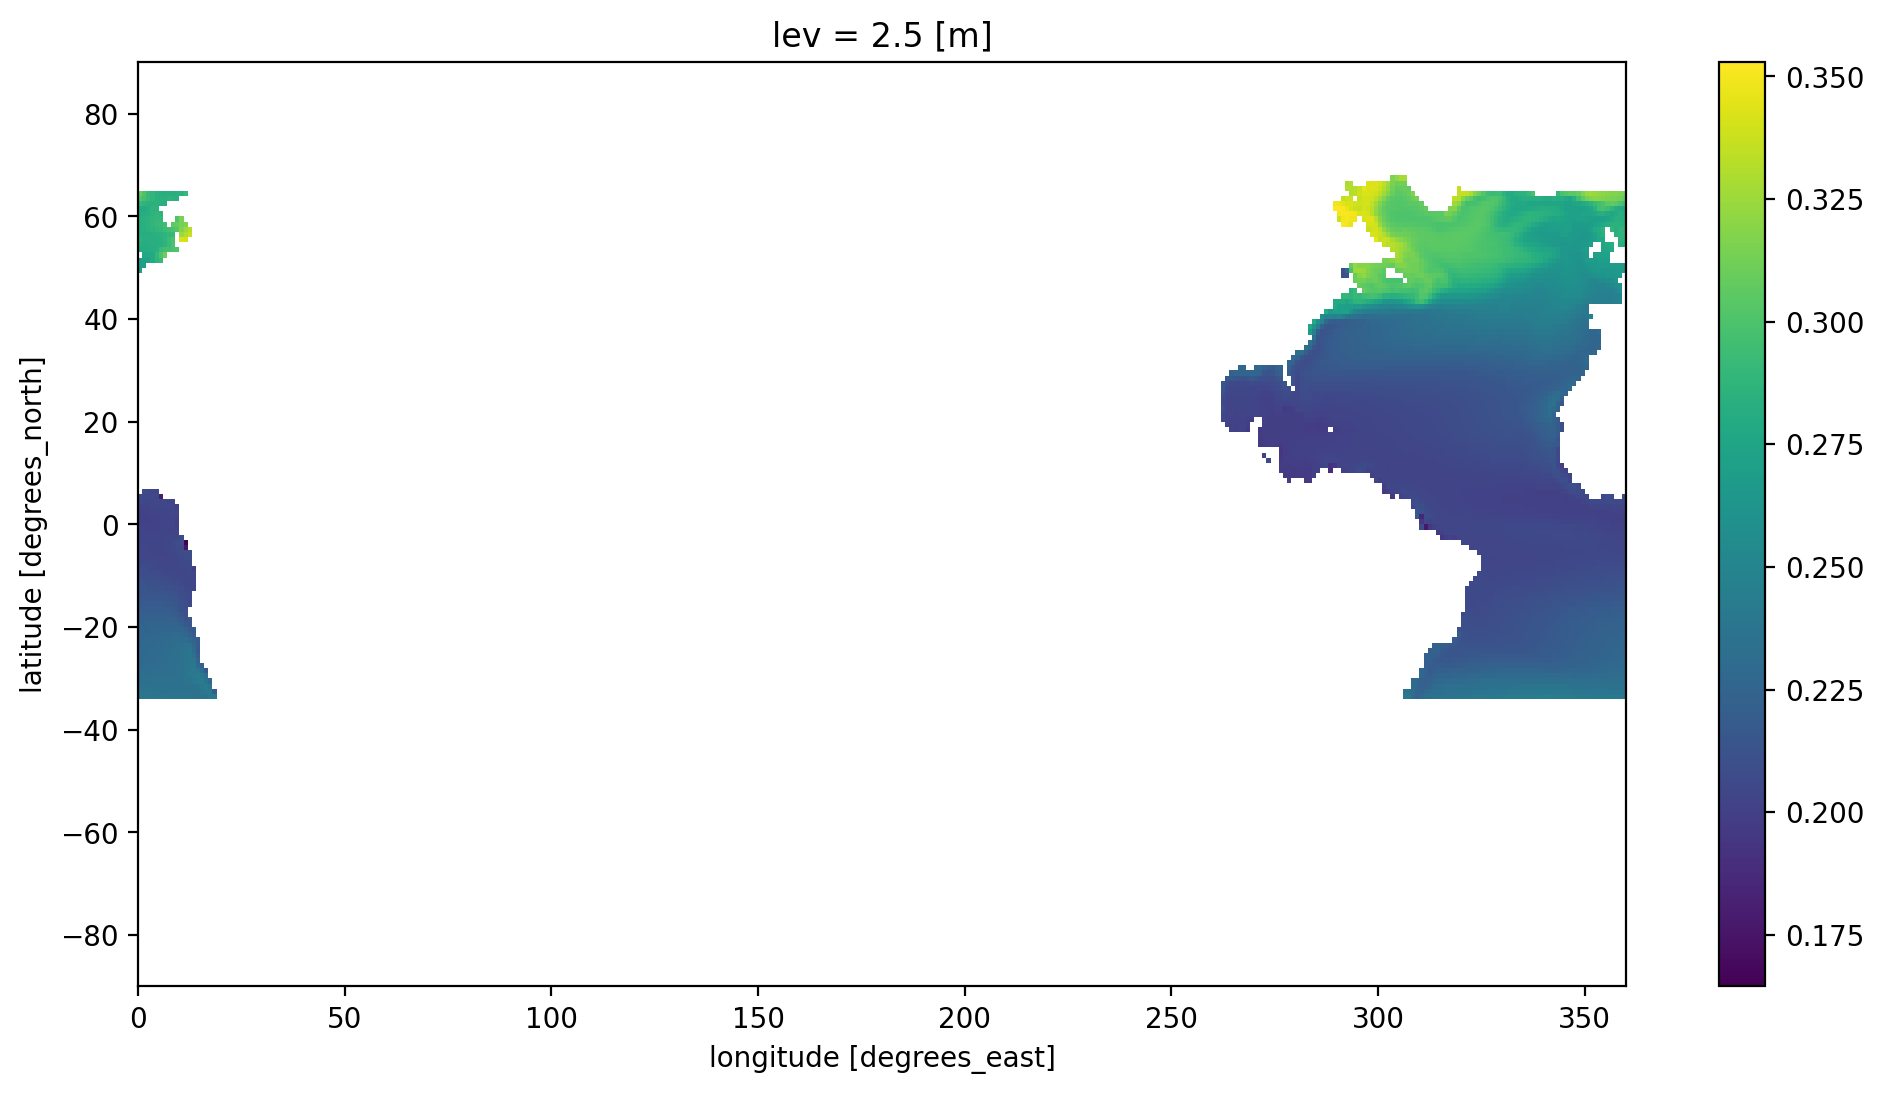

In [39]:
esm4_O2_atlantic.isel(lev=0).mean(dim='time').plot()

In [41]:
subplot_kws = dict(projection=ccrs.Robinson(facecolor='grey')

plt.figure(figsize=[12,8])

p = esm4_O2_atlantic.isel(lev=0).plot(x='longitude',y='latitude',
                         cmap=cmocean.cm.balance, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("ESM4 AOU [μmol/kg]",fontsize=16)

SyntaxError: invalid syntax (2568776554.py, line 3)

In [ ]:
pacificocean

Text(0.5, 1.0, 'Ocean Basin Mask')

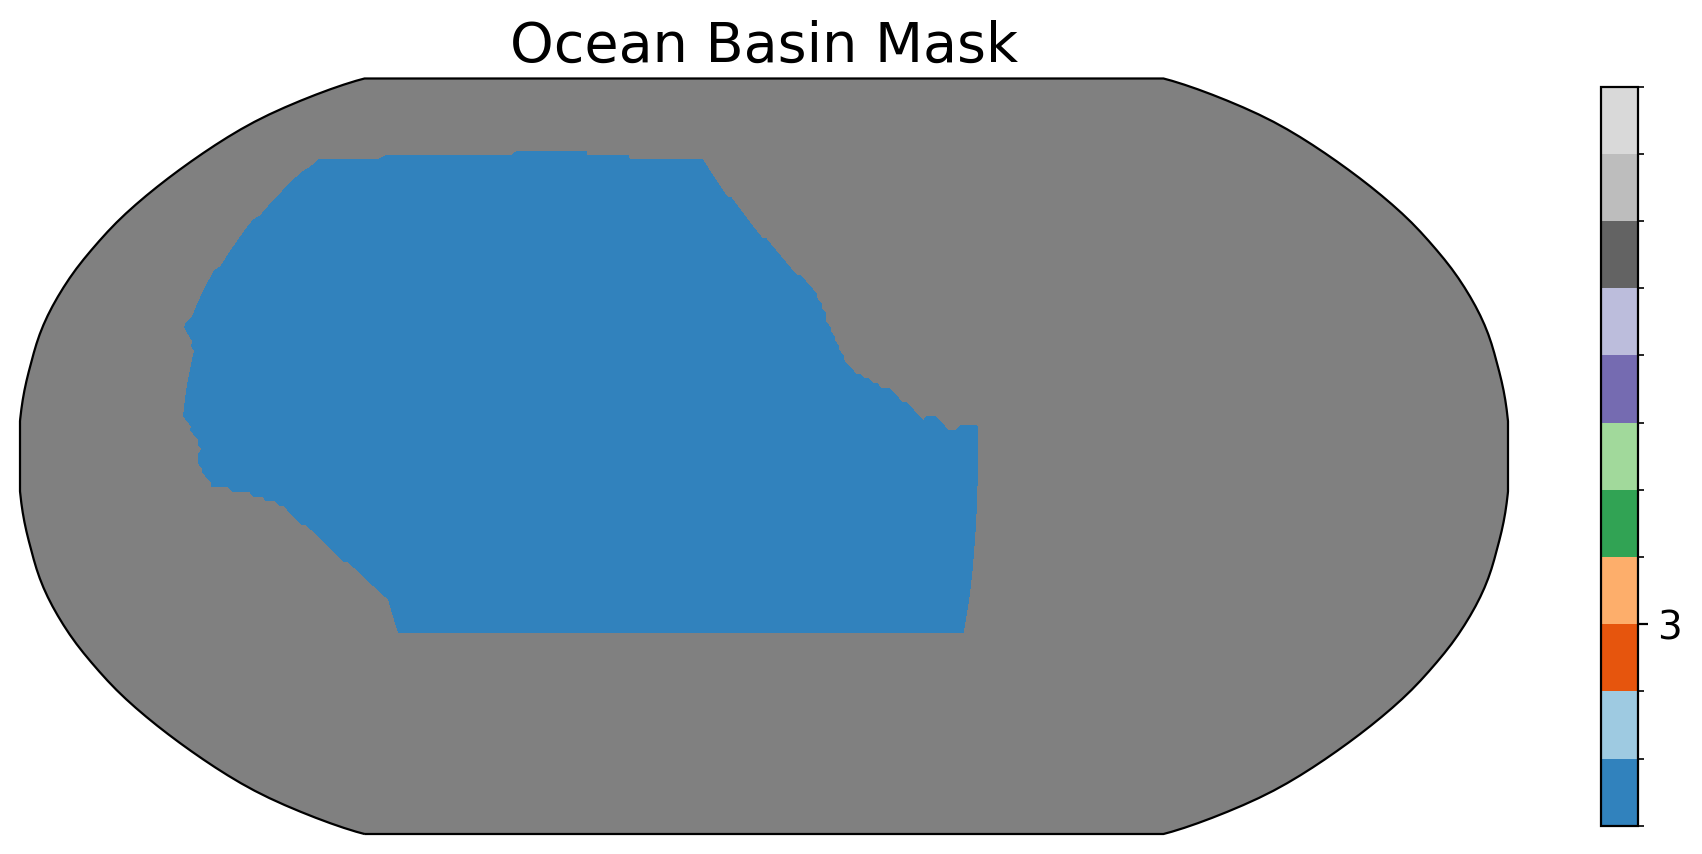

In [53]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = pacificocean.plot.contourf(x='longitude',y='latitude',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[3], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [47]:
arcticocean

<xarray.DataArray 'basins' (latitude: 180, longitude: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lev        float64 2.5
    time       int64 0
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    lon        (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5

Text(0.5, 1.0, 'Ocean Basin Mask')

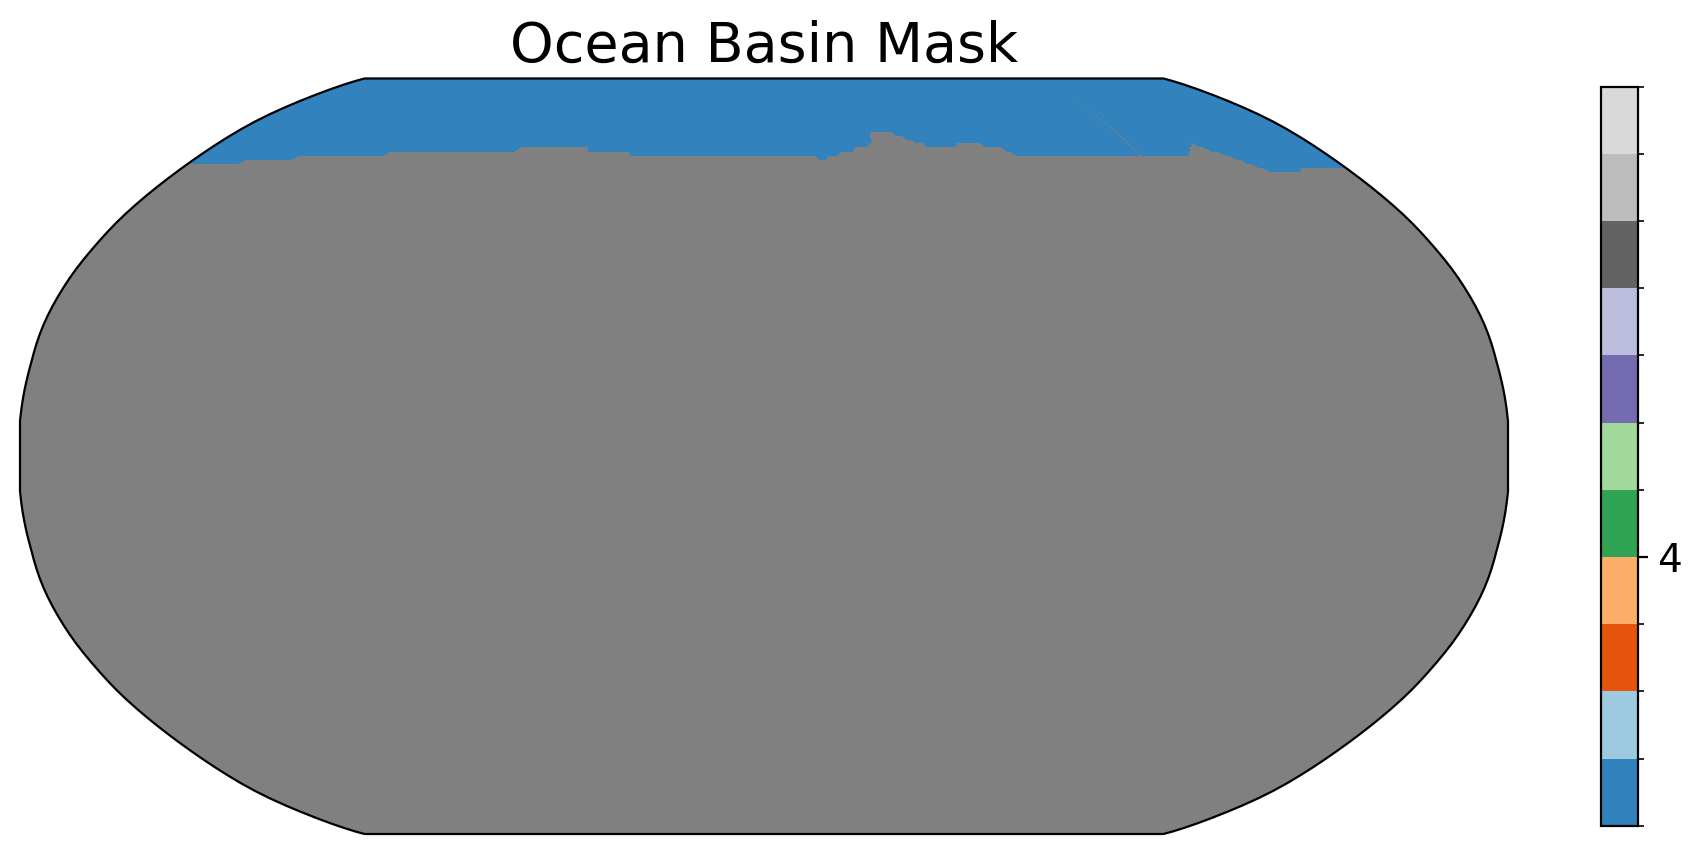

In [52]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = arcticocean.plot.contourf(x='longitude',y='latitude',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[4], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [49]:
indianocean

<xarray.DataArray 'basins' (latitude: 180, longitude: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lev        float64 2.5
    time       int64 0
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    lon        (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5

Text(0.5, 1.0, 'Ocean Basin Mask')

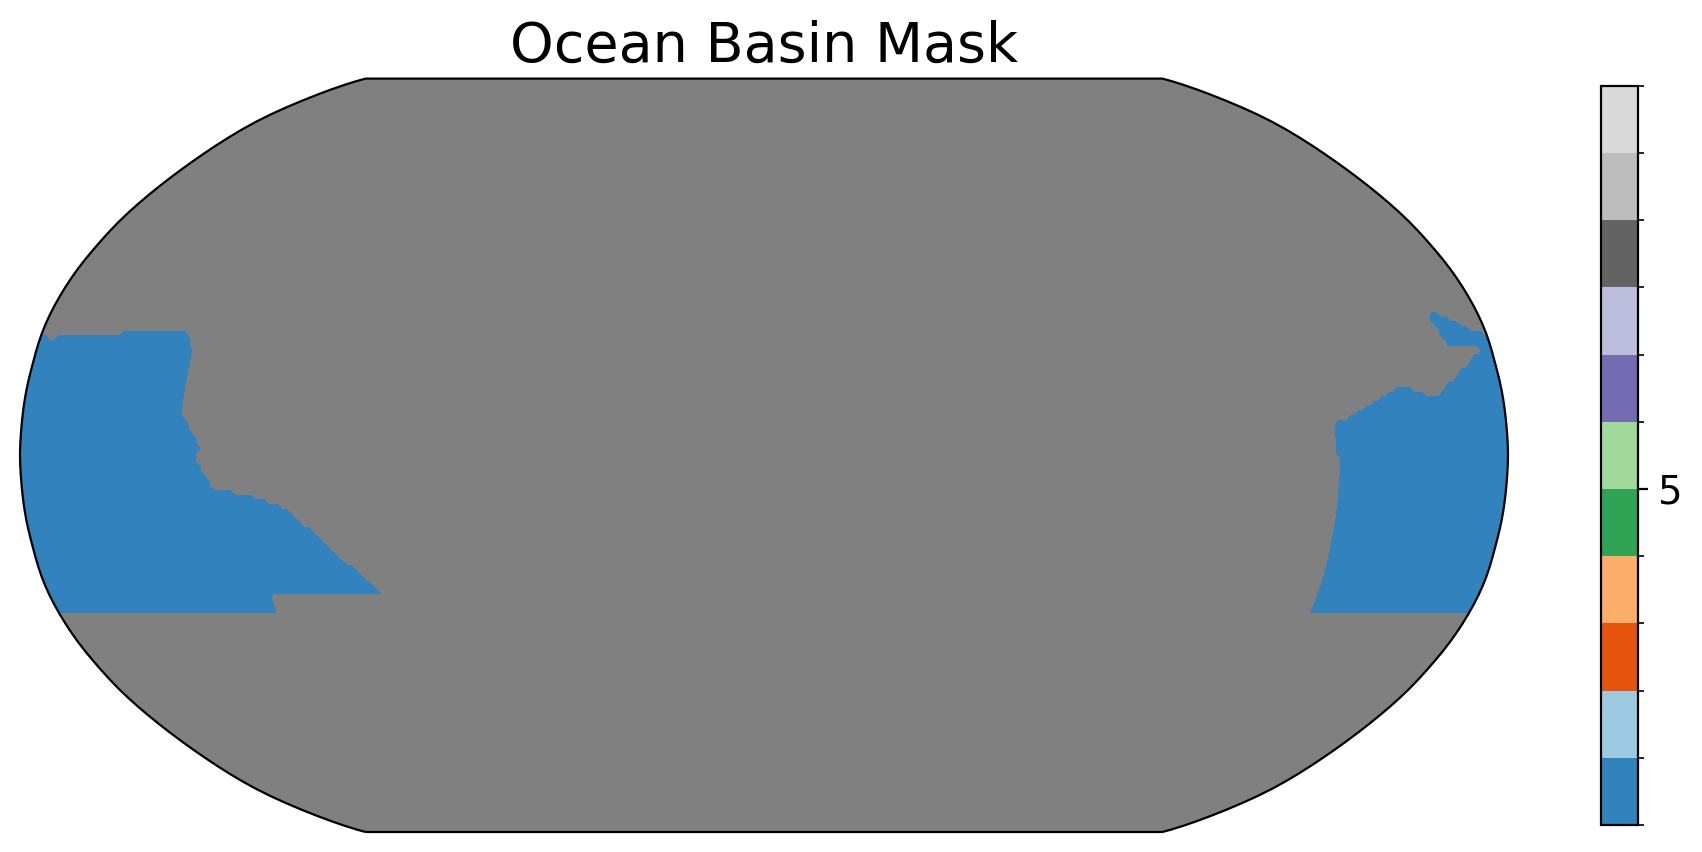

In [51]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = indianocean.plot.contourf(x='longitude',y='latitude',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[5], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)